In [ ]:
grib_ls -l 45.72,9.542,1 -p dataDate,dataTime,validityDate,validityTime,stepRange 200509_ten3_Tdeep_tpH_zoom.grb2
grib_ls -l 45.72,9.542,1 -p dataDate,dataTime,validityDate,validityTime,stepRange 2005_tpH

In [3]:
import os
import sys
sys.path.append("/home/lcesarini/2022_resilience/")
import argparse
import subprocess
# import rioxarray
import numpy as np 
import xarray as xr 
import pandas as pd
from glob import glob
from tqdm import tqdm
import geopandas as gpd
import matplotlib as mpl
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
from cartopy import feature as cfeature

PATH_GRID="/home/lcesarini/2022_resilience/resilience/scripts/newcommongrid.txt"
PATH_SPHERA="/mnt/data/lcesarini/SPHERA"
PATH_SPHERA_OUT="/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/reanalysis/SPHERA/pr"

os.chdir("/home/lcesarini/2022_resilience")

from resilience.utils import *
from cfgrib.xarray_to_grib import to_grib

NAME_VAR="tp"
SHORT_VAR="tp"


FileNotFoundError: [Errno 2] No such file or directory: '/home/lcesarini/2022_resilience'

In [15]:
x=xr.open_dataset("/mnt/data/lcesarini/gripho-v1_1h_TSmin30pct_2001-2016_cut3km.nc")
x

<xarray.Dataset>
Dimensions:  (time: 140256, y: 402, x: 353)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T00:22:30 ... 2016-12-31T23:00:00
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
  * x        (x) float64 4.05e+06 4.053e+06 4.056e+06 ... 5.103e+06 5.106e+06
  * y        (y) float64 1.505e+06 1.508e+06 1.511e+06 ... 2.705e+06 2.708e+06
Data variables:
    crs      int32 ...
    pr       (time, y, x) float32 ...
Attributes: (12/22)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    Conventions:                    CF-1.7
    history:                        Fri Mar 19 12:49:39 2021: cdo -L -z zip -...
    source:                         Precipitation data from in-situ stations ...
    institution:                    ICTP
    crs:                            +proj=laea +lat_0=52 +lon_0=10 +x_0=43210...
    ...                             ...
    title:                          GRIPHO - GRidded Italian Precipitation Ho...
    contact:                        afantini@ictp.it
    references:                     Fantini et al. (2019, in publication)
    version:                        v1.0
    years_available:                2001-2016
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [18]:
x.sel(time=x['time.year'].isin(2011)).to_netcdf("/mnt/data/lcesarini/gripho_2011.nc",
                                                encoding={'pr':{"zlib": True, "complevel": 9}})

In [20]:
yr=xr.open_dataset("/mnt/data/lcesarini/gripho_2011.nc")
yr

<xarray.Dataset>
Dimensions:  (time: 8760, y: 402, x: 353)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01T00:22:30 ... 2011-12-31T23:22:30
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
  * x        (x) float64 4.05e+06 4.053e+06 4.056e+06 ... 5.103e+06 5.106e+06
  * y        (y) float64 1.505e+06 1.508e+06 1.511e+06 ... 2.705e+06 2.708e+06
Data variables:
    crs      int32 ...
    pr       (time, y, x) float32 ...
Attributes: (12/22)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    Conventions:                    CF-1.7
    history:                        Fri Mar 19 12:49:39 2021: cdo -L -z zip -...
    source:                         Precipitation data from in-situ stations ...
    institution:                    ICTP
    crs:                            +proj=laea +lat_0=52 +lon_0=10 +x_0=43210...
    ...                             ...
    title:                          GRIPHO - GRidded Italian Precipitation Ho...
    contact:                        afantini@ictp.it
    references:                     Fantini et al. (2019, in publication)
    version:                        v1.0
    years_available:                2001-2016
    CDO:                            Climate Data Operators version 1.9.8 (htt...

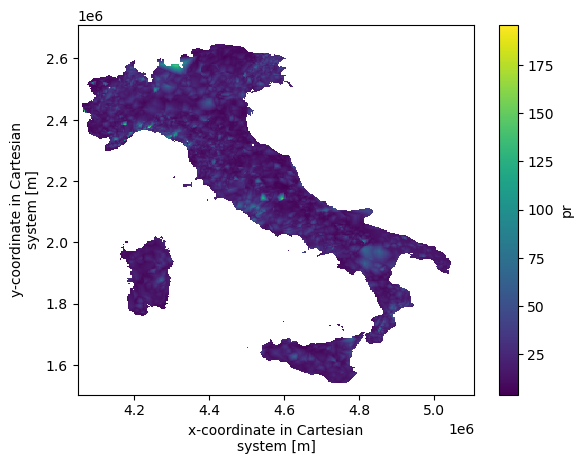

In [21]:
yr.pr.max(dim='time').plot.pcolormesh()

In [22]:
rem=xr.open_dataset("/mnt/data/lcesarini/gripho_cons_2011.nc")
rem

<xarray.Dataset>
Dimensions:  (time: 8760, lon: 272, lat: 158)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01T00:22:30 ... 2011-12-31T23:22:30
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/23)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Wed Jan 03 00:00:57 2024: cdo remapycon,/...
    source:                         Precipitation data from in-situ stations ...
    institution:                    ICTP
    Conventions:                    CF-1.7
    crs:                            +proj=laea +lat_0=52 +lon_0=10 +x_0=43210...
    ...                             ...
    contact:                        afantini@ictp.it
    references:                     Fantini et al. (2019, in publication)
    version:                        v1.0
    years_available:                2001-2016
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [24]:
rem.pr.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [8]:
uas=xr.load_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ICTP/CPM/uas/uas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-7_fpsconv-x2yn2-v1_1hr_200001010030-200012312330.nc")
vas=xr.load_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ICTP/CPM/vas/vas_ICTP_ECMWF-ERAINT_200001010030-200012312330.nc")

vas

<xarray.Dataset>
Dimensions:  (time: 8784, lon: 272, lat: 158)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T01:00:00 ... 2001-01-01
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
    height   float64 10.0
Data variables:
    vas      (time, lat, lon) float32 -4.133 -4.145 -4.251 ... -0.1415 -0.1019
Attributes: (12/152)
    CDI:                                       Climate Data Interface version...
    history:                                   Mon Feb 20 16:18:22 2023: cdo ...
    source:                                    RegCM Model output file
    institution:                               International Centre for Theor...
    Conventions:                               CF-1.7
    ipcc_scenario_code:                        EVALUATION
    ...                                        ...
    holtslag_th10_estimate:                    1
    holtslag_th10_maximize:                    1
    holtslag_th10_niteration:                  1
    frequency:                                 1hr
    project_id:                                CORDEX-FPSCONV
    CDO:                                       Climate Data Operators version...

In [6]:
np.nanmax(vas.vas.values)

38.237103

In [9]:
mw = np.sqrt(np.power(uas.uas.values,2) +\
             np.power(vas.vas.values,2))


In [11]:
print(f"MASSIMO modulo:{np.nanmax(mw)}")


MASSIMO modulo:42.60246276855469


In [12]:
mw2=xr.load_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ICTP/CPM/mw/mw_ICTP_ECMWF-ERAINT_200101010030-200112312330.nc")

In [14]:
mw2

<xarray.Dataset>
Dimensions:  (time: 8760, lon: 272, lat: 158)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T01:00:00 ... 2002-01-01
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Data variables:
    mw       (time, lat, lon) float32 1.532 1.573 1.555 ... 3.415 3.4 3.793
Attributes: (12/152)
    CDI:                                       Climate Data Interface version...
    history:                                   Fri Feb 10 16:08:07 2023: cdo ...
    source:                                    RegCM Model output file
    institution:                               International Centre for Theor...
    Conventions:                               CF-1.7
    ipcc_scenario_code:                        EVALUATION
    ...                                        ...
    holtslag_th10_estimate:                    1
    holtslag_th10_maximize:                    1
    holtslag_th10_niteration:                  1
    frequency:                                 1hr
    project_id:                                CORDEX-FPSCONV
    CDO:                                       Climate Data Operators version...

In [15]:
print(f"MASSIMO modulo:{np.nanmax(mw2.mw.values)}")


MASSIMO modulo:38.13402557373047


In [2]:
import cfgrib
import numpy as np

def decumulate_rainfall(grib_file_path):
    with cfgrib.open_dataset(grib_file_path) as ds:
        # Assuming precipitation is stored in the 'tp' field
        precipitation_data = ds['tp'].values

        # Reshape the data to have 24-hour intervals along the time axis
        reshaped_data = precipitation_data.reshape((-1, 24) + precipitation_data.shape[1:])

        # Accumulate the precipitation over each 24-hour period
        accumulated_data = np.sum(reshaped_data, axis=1)

        # Decumulate the precipitation data
        decumulated_data = np.diff(accumulated_data, axis=0, prepend=0)

        # Update the 'tp' field in the dataset with the decumulated data
        ds['tp'].values = decumulated_data

        # Save the decumulated dataset to a new GRIB file
        decumulated_grib_file_path = 'decumulated_' + grib_file_path
        ds.to_grib2(decumulated_grib_file_path)

    print(f"Decumulated data saved to: {decumulated_grib_file_path}")




In [4]:
NAME_VAR='tp'
patterns_original = [
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2000**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2001**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2002**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2003**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2004**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2005**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2006**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2007**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2008**zoom.grb2*', 
    f'/mnt/data/lcesarini/SPHERA/{NAME_VAR}/*2009**zoom.grb2*', 
            ]

# Use glob to find files matching any of the specified patterns
matching_files = []
for pattern in patterns_original:
    matching_files.extend(glob(pattern))


ll_files=np.array(matching_files)[['idx' not in xx for xx in matching_files]]

In [6]:
ll_files=''

array([], dtype=float64)

In [7]:
xr.open_dataset("/mnt/beegfs/lcesarini/SPHERA/original/pr/200002_ten3_Tdeep_tpH_zoom.grb2")

<xarray.Dataset>
Dimensions:     (time: 216, step: 24, y: 214, x: 260)
Coordinates:
  * time        (time) datetime64[ns] 2000-02-21T01:00:00 ... 2000-03-01
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  (time, step) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    tp          (time, step, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2024-04-08T17:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [98]:
# ds_cfgrib=[xr.open_mfdataset(ll,engine="cfgrib").load() for ll in ll_files][:2]
# ds_cfgrib=xr.concat(ds_cfgrib,dim='time')
ll_ds_cfgrib=[]
for file in ll_files:
    try:
        ll_ds_cfgrib.append(xr.open_mfdataset(file,engine="cfgrib").load())
    except Exception as e:
        print(f"An error occurred while processing {file}: {e}")

Can't read index file '/mnt/data/lcesarini/SPHERA/tp/200003_ten2_Tdeep_tpH_zoom.grb2.923a8.idx'
Traceback (most recent call last):
  File "/home/lcesarini/miniconda3/envs/my_xclim_env/lib/python3.10/site-packages/cfgrib/messages.py", line 547, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
  File "/home/lcesarini/miniconda3/envs/my_xclim_env/lib/python3.10/site-packages/cfgrib/messages.py", line 429, in from_indexpath
    index = pickle.load(file)
EOFError: Ran out of input
Can't read index file '/mnt/data/lcesarini/SPHERA/tp/200011_ten3_Tdeep_tpH_zoom.grb2.923a8.idx'
Traceback (most recent call last):
  File "/home/lcesarini/miniconda3/envs/my_xclim_env/lib/python3.10/site-packages/cfgrib/messages.py", line 547, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
  File "/home/lcesarini/miniconda3/envs/my_xclim_env/lib/python3.10/site-packages/cfgrib/messages.py", line 429, in from_indexpath
    index = pickle.load(file)
EOFError: Ran out

: 

In [84]:
ds_cf_grib=xr.concat(ll_ds_cfgrib,dim='time')
ds_cf_grib

<xarray.Dataset>
Dimensions:     (time: 12359, step: 24, y: 214, x: 260)
Coordinates:
  * time        (time) datetime64[ns] 2000-01-01T01:00:00 ... 2001-06-01
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 0.0
    latitude    (y, x) float64 43.25 43.25 43.25 43.25 ... 47.5 47.5 47.5 47.5
    longitude   (y, x) float64 6.512 6.539 6.567 6.594 ... 13.84 13.87 13.9
    valid_time  (time, step) datetime64[ns] 2000-01-01T02:00:00 ... 2001-06-02
Dimensions without coordinates: y, x
Data variables:
    tp          (time, step, y, x) float32 0.0 0.0 0.0 0.0 ... 24.23 23.07 20.39
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2023-12-20T14:25 GRIB to CDM+CF via cfgrib-0.9.1...

In [85]:
new_array=np.zeros(shape=(ds_cf_grib.time.shape[0],ds_cf_grib.y.shape[0],ds_cf_grib.x.shape[0])) * np.nan
new_array2=np.zeros(shape=(ds_cf_grib.time.shape[0],ds_cf_grib.y.shape[0],ds_cf_grib.x.shape[0])) * np.nan
new_array2.shape

(12359, 214, 260)

In [86]:
ll_sphera=[ds_cf_grib[list(ds_cf_grib.data_vars)[0]].values[time,step,:,:] for step,time in zip(np.tile(np.arange(24),int(ds_cf_grib.time.shape[0]/24)),
                                                                                              np.arange(ds_cf_grib.time.shape[0]))]

arr=np.array(ll_sphera)
len(ll_sphera)

12336

In [ ]:
f_step=[i for _ in np.arange((ds_cf_grib.time.shape[0] / 24)) for i in np.arange(0,24)]

for i,j in zip(f_step,np.arange(ds_cf_grib.time.shape[0])):
    if i == 0:
        print(j)
        j_value=arr[j,:,:]
        new_array2[j,:,:]=j_value
    else:
        j_value=arr[j,:,:]
        j_t_1=arr[j-1,:,:]
        new_array2[j,:,:]=j_value-j_t_1

new_ds = xr.DataArray(new_array2, 
    coords={'time':ds_cf_grib.time,
            'lon': ds_cf_grib.x.values, 
            'lat': ds_cf_grib.y.values
            },
    # coords=dict(UAS.uas.coords),
    dims={'time' :ds_cf_grib.time.shape[0],
            'lat':ds_cf_grib.y.shape[0],
            'lon':ds_cf_grib.x.shape[0]},
    # dims=UAS.uas.dims,
    # attrs = UAS.uas.attrs
    ) 


In [89]:
new_ds

<xarray.DataArray (time: 3144, lat: 214, lon: 260)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
...
        [ 0.3125    ,  0.2734375 ,  0.19335938, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.52734375,  0.44726562,  0.33984375, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.80664062,  0.72265625,  0.59960938, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        , -0.00195312, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.00195312,  0.00195312, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.00195312,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.00195312,  0.00195312,  0.00195312, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.00195312, ...,  0.        ,
          0.        ,  0.        ],
        [-0.00195312,  0.        ,  0.00195312, ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-02-01T01:00:00 ... 2000-06-11
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 252 253 254 255 256 257 258 259
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 ... 206 207 208 209 210 211 212 213

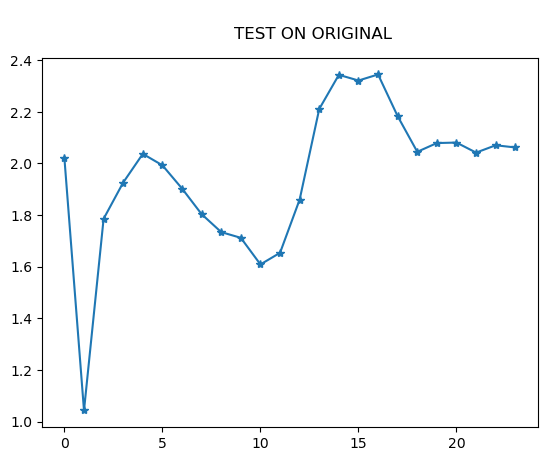

In [90]:
q99_test=new_ds.groupby(new_ds['time.hour']).quantile(q=0.99,dim='time',skipna=True)

ax=plt.axes()
plt.plot(q99_test.mean(dim=['lon','lat']),marker='*')
plt.suptitle(f"""
            TEST ON ORIGINAL
            """)
# ax.set_ylim((0.5,3))
plt.show()

In [93]:
new_ds_jja=get_season(new_ds,'JJA')
# new_ds_jja=xr.where(new_ds_jja > 0.1,new_ds_jja,np.nan)
new_ds_jja=xr.where(new_ds > 0.1,new_ds,np.nan)


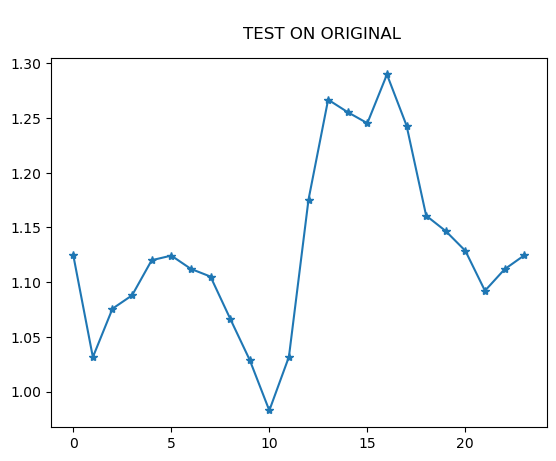

In [94]:
q99_test=new_ds_jja.groupby(new_ds_jja['time.hour']).mean(dim='time',skipna=True)

ax=plt.axes()
plt.plot(q99_test.mean(dim=['lon','lat']),marker='*')
plt.suptitle(f"""
            TEST ON ORIGINAL
            """)
# ax.set_ylim((0.5,3))
plt.show()

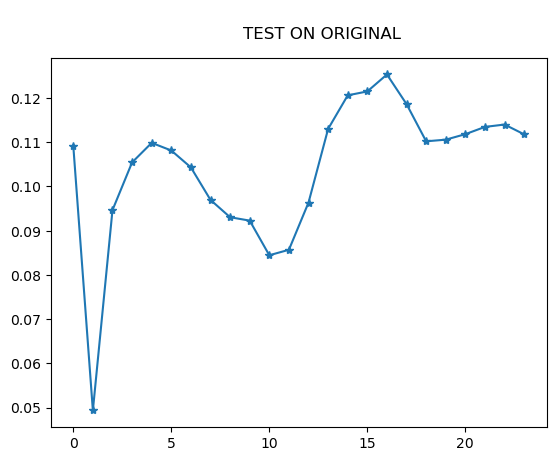

In [95]:
q99_test=new_ds.groupby(new_ds['time.hour']).mean(dim='time',skipna=True)

ax=plt.axes()
plt.plot(q99_test.mean(dim=['lon','lat']),marker='*')
plt.suptitle(f"""
            TEST ON ORIGINAL
            """)
# ax.set_ylim((0.5,3))
plt.show()

In [3]:
# Specify the path to your GRIB file
grib_file_path = '/mnt/data/lcesarini/SPHERA/tp/200003_ten3_Tdeep_tpH_zoom.grb2'
with cfgrib.open_dataset(grib_file_path) as ds:
    # Assuming precipitation is stored in the 'tp' field
    precipitation_data = ds['tp'].values
    

precipitation_data

array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,    

In [4]:
np.tile(np.arange(24),20).shape==np.arange(480).shape

True

In [5]:
ll_sphera=[precipitation_data[time,step,:,:] for step,time in zip(np.tile(np.arange(24),20),np.arange(480))]

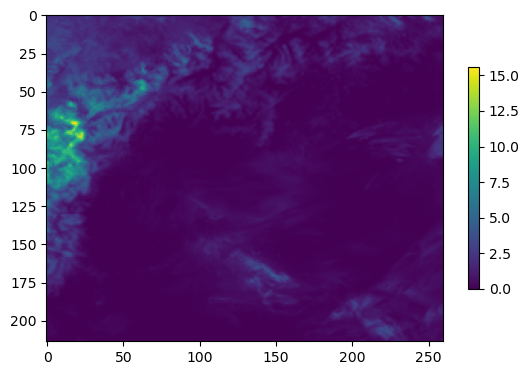

In [59]:
arr=np.array(ll_sphera)
pcm=plt.imshow(np.flip(np.quantile(arr,q=0.8,axis=0),axis=0))
plt.colorbar(pcm,shrink=0.6)

In [55]:
new_array=np.zeros(shape=arr.shape) * np.nan
for i,j in zip(np.tile(np.arange(24),20),np.arange(480)):
    if i == 0:
        new_array[j,:,:]=arr[j,:,:]
    else:
        new_array[j,:,:]=arr[j,:,:]-arr[j-1,:,:]

In [56]:
x=np.arange(480)
y=np.zeros(shape=x.shape) * np.nan
for i,j in zip(np.tile(np.arange(24),20),np.arange(480)):
    if i == 0:
        y[j]=x[j]
        print(i,j,y[j],x[j],x[j-1])
    else:
        y[j]=x[j]-x[j-1]
        print(i,j,y[j],x[j],x[j-1])


0 0 0.0 0 479
1 1 1.0 1 0
2 2 1.0 2 1
3 3 1.0 3 2
4 4 1.0 4 3
5 5 1.0 5 4
6 6 1.0 6 5
7 7 1.0 7 6
8 8 1.0 8 7
9 9 1.0 9 8
10 10 1.0 10 9
11 11 1.0 11 10
12 12 1.0 12 11
13 13 1.0 13 12
14 14 1.0 14 13
15 15 1.0 15 14
16 16 1.0 16 15
17 17 1.0 17 16
18 18 1.0 18 17
19 19 1.0 19 18
20 20 1.0 20 19
21 21 1.0 21 20
22 22 1.0 22 21
23 23 1.0 23 22
0 24 24.0 24 23
1 25 1.0 25 24
2 26 1.0 26 25
3 27 1.0 27 26
4 28 1.0 28 27
5 29 1.0 29 28
6 30 1.0 30 29
7 31 1.0 31 30
8 32 1.0 32 31
9 33 1.0 33 32
10 34 1.0 34 33
11 35 1.0 35 34
12 36 1.0 36 35
13 37 1.0 37 36
14 38 1.0 38 37
15 39 1.0 39 38
16 40 1.0 40 39
17 41 1.0 41 40
18 42 1.0 42 41
19 43 1.0 43 42
20 44 1.0 44 43
21 45 1.0 45 44
22 46 1.0 46 45
23 47 1.0 47 46
0 48 48.0 48 47
1 49 1.0 49 48
2 50 1.0 50 49
3 51 1.0 51 50
4 52 1.0 52 51
5 53 1.0 53 52
6 54 1.0 54 53
7 55 1.0 55 54
8 56 1.0 56 55
9 57 1.0 57 56
10 58 1.0 58 57
11 59 1.0 59 58
12 60 1.0 60 59
13 61 1.0 61 60
14 62 1.0 62 61
15 63 1.0 63 62
16 64 1.0 64 63
17 65 1.0 65 64
1

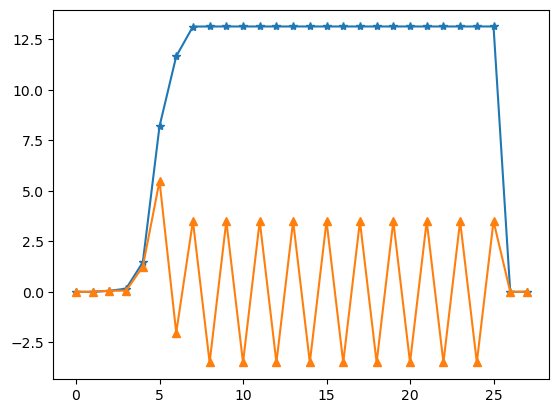

In [63]:
plt.plot(arr[238:266,12,12],marker='*')
plt.plot(new_array[238:266,12,12],marker='^')

In [7]:
arr_decumulated=np.diff(arr.reshape(24,20,214,260),axis=1,prepend=0).reshape(480,214,260)
# arr_decumulated=np.where(arr_decumulated<0,0,arr_decumulated)

In [6]:
import xarray as xr
ds_cfgrib=xr.open_dataset(f'/mnt/data/lcesarini/SPHERA/tp/200003_ten3_Tdeep_tpH_zoom.grb2',engine="cfgrib")
sc=ds_cfgrib.isel(x=100,y=200)

In [8]:
ds_cfgrib

<xarray.Dataset>
Dimensions:     (time: 264, step: 24, y: 214, x: 260)
Coordinates:
  * time        (time) datetime64[ns] 2000-03-21T01:00:00 ... 2000-04-01
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  (time, step) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    tp          (time, step, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2023-12-20T11:40 GRIB to CDM+CF via cfgrib-0.9.1...

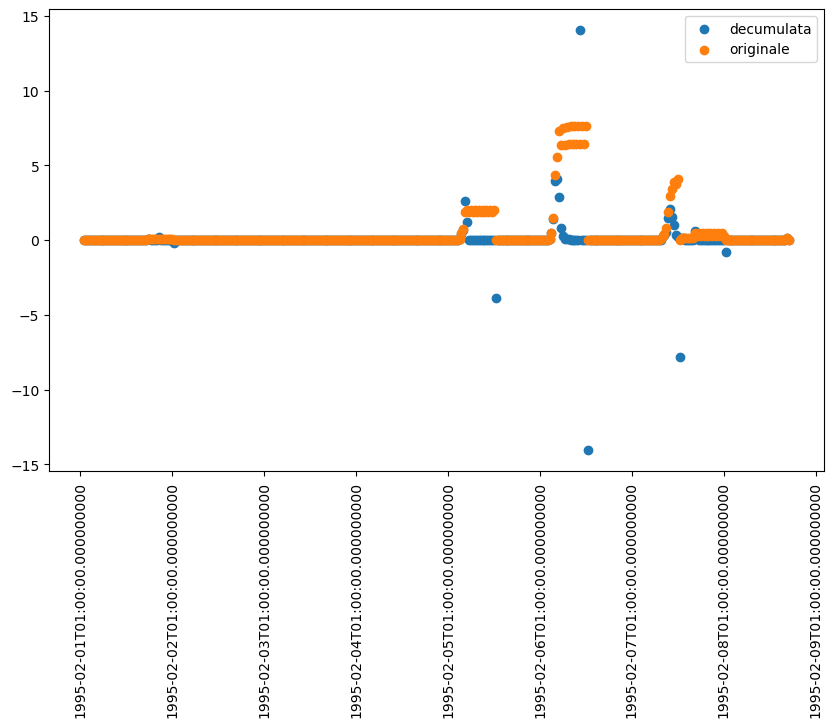

In [31]:
st,end=1,370
fig=plt.figure(figsize=(10,6))
ax=plt.axes()
ax.scatter(sc.time.values[st:end],arr_decumulated[st:end,100,100],label='decumulata')
ax.scatter(sc.time.values[st:end],arr[st:end,100,100],label='originale')
plt.legend()
ax.set_xticklabels(sc.time.values[::24],rotation=90);



In [7]:
ds_cfgrib=xr.open_dataset(f'/mnt/data/lcesarini/SPHERA/tp/199502_ten2_Tdeep_tpH_zoom.grb2',engine="cfgrib")
ds_cfgrib

<xarray.Dataset>
Dimensions:     (time: 480, step: 24, y: 214, x: 260)
Coordinates:
  * time        (time) datetime64[ns] 1995-02-01T01:00:00 ... 1995-02-21
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  (time, step) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    tp          (time, step, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2023-12-18T22:53 GRIB to CDM+CF via cfgrib-0.9.1...

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from glob import glob

PATH_WIND="/mnt/data/lcesarini/wind"

meta_station=pd.read_csv(f"{PATH_WIND}/meta_stazioni_vento_4326.csv")
speed_10=glob("/mnt/data/lcesarini/wind/10m/*")

name_sta=[pd.read_csv(speed_10[i],encoding="utf-8").STAZIONE[0] for i in np.arange(22)]
sta_wind=meta_station[meta_station.Nome.isin(name_sta)]
#make folium map of meta station
m = folium.Map(location=[45.5, 12.5], zoom_start=7)
for i in np.arange(sta_wind.shape[0]):
    folium.Marker([sta_wind.lat.values[i], 
                   sta_wind.lon.values[i]], 
                   popup=sta_wind.Nome.values[i]).add_to(m)
    
m


In [24]:
from windrose import WindroseAxes 
nc="malo"
vel_10=glob("/mnt/data/lcesarini/wind/10m/*Vel*")
dir_10=glob("/mnt/data/lcesarini/wind/10m/*dir*")

['/mnt/data/lcesarini/wind/10m/Vel_10m_Conegliano.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Porto Tolle - Pradon.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Castelfranco Veneto.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Lonigo.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Montagnana.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Rosolina - Po di Tramontana.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Adria - Bellombra.csv',
 "/mnt/data/lcesarini/wind/10m/Vel_10m_Sorga'.csv",
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Bardolino - Calmasino.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Roverchiara.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Malo.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Portogruaro - Lison.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Cavallino Treporti.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Teolo.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Cavarzere.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Tribano.csv',
 '/mnt/data/lcesarini/wind/10m/Vel_10m_Asiago - aeropor

In [25]:
# Original file name
!original_name="file' with spaces.txt"

# Replace spaces with underscores
!new_name="${original_name// /_}"

# Remove single quotes
!new_name="${new_name//\'/}"


In [26]:
nc=name_sta[1]

In [27]:


vel_sta=pd.read_csv(np.array(vel_10)[np.array([nc in x for x in vel_10])].item(),encoding="utf-8")
dir_sta=pd.read_csv(np.array(dir_10)[np.array([nc in x for x in dir_10])].item(),encoding="utf-8")

vel_sta

STAZIONE        DATA    ORA  VALORE
0       Porto Tolle - Pradon  2000-01-01  01:00     2.5
1       Porto Tolle - Pradon  2000-01-01  02:00     2.8
2       Porto Tolle - Pradon  2000-01-01  03:00     2.7
3       Porto Tolle - Pradon  2000-01-01  04:00     2.5
4       Porto Tolle - Pradon  2000-01-01  05:00     2.5
...                      ...         ...    ...     ...
191807  Porto Tolle - Pradon  2021-12-31  20:00     0.8
191808  Porto Tolle - Pradon  2021-12-31  21:00     2.1
191809  Porto Tolle - Pradon  2021-12-31  22:00     2.5
191810  Porto Tolle - Pradon  2021-12-31  23:00     1.6
191811  Porto Tolle - Pradon  2022-01-01  00:00     1.0

[191812 rows x 4 columns]

Text(0.5, 1.0, 'Porto Tolle - Pradon STAZIONE')

<Figure size 1000x1000 with 0 Axes>

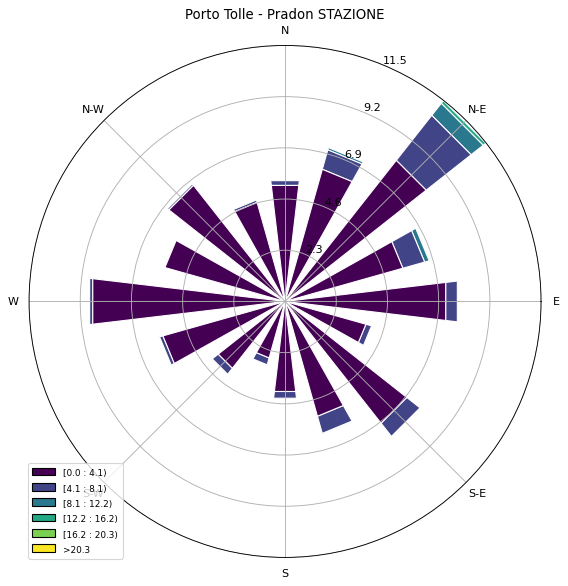

In [33]:
df_merge=pd.merge(vel_sta,dir_sta,on=["STAZIONE","DATA","ORA"],how='left').dropna()

fig=plt.figure(figsize=(10,10))
ax2 = WindroseAxes.from_ax()
ax2.bar(np.array(df_merge.VALORE_y), np.array(df_merge.VALORE_x), nsector=16, 
        # bins=np.arange(5,25,5), 
        opening=0.6, edgecolor='white', normed=True)
ax2.set_legend()
ax2.set_title(f"{nc} STAZIONE")


In [36]:
from folium import IFrame

fig.to_html("/home/lcesarini/prova.html")

AttributeError: 'Figure' object has no attribute 'to_html'

In [21]:
m

# Wind data from station

EDA of the data from ARPA 
1) raffica 1 dato al giorno (la stazione rileva datiu di velocità vento ogni 2 secondi circa e alla fine del giorno estrare il dato di velocità massima e il relativo orario;

2) dati orari "su stazioni  del Centro di Teolo" : il dato originale è acquisito ogni 10 minuti (dalle rilevazioni effettuate ogni 2 secondi) per le velocità stiamo parlando di valori scalari e quindi x dati orari media dei 6 valori acquistiti
2 bis) per direzione dato acquisito ogni 10 minuti qui si ragiona in termini di moda sia sui 10 minuti che sull'ora

3) il vento dovrebbe essere misurato a 10 m dal suolo ma gran parte delle stazioni di montagna ha vento a 5 m e diverse agrometeo hanno vento a 2 m dal suolo. In alcuni casi i sensori, nel corso degli anni sono stati alzati. Ovviamente soprattutto per le velocità c'è un'evidente differenza.

4) Qui starebbe bene una parolaccia, stiamo parlando di circa 17 stazioni gestite dal centro valanghe di Arabba e aventi tecnologia diversa dalle stazioni del centro meteo e che elaborano dati orari e giornalieri con formule diverse da quelle che usiamo noi.
Peccato perchè sono stazioni in alta quota e tutte con palo da 10 m  ma abbiamo diversi dubbi su questi dati peraltro scarsamente controllati. 
Vi consiglio di LASCIAR PERDERE questi dati 

In [1]:
import os
import sys
import argparse
# import rioxarray
import numpy as np 
import xarray as xr 
import pandas as pd
from glob import glob
# from tqdm import tqdm
import geopandas as gpd
import matplotlib as mpl
from random import sample
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
from shapely.geometry import mapping
from cartopy import feature as cfeature
sys.path.append("/home/lcesarini/2022_resilience/")

from resilience.utils import *

shp_triveneto = gpd.read_file("/home/lcesarini/2022_resilience/data/gadm36_ITA.gpkg", layer="gadm36_ITA_1")
shp_triveneto = shp_triveneto[np.isin(shp_triveneto.NAME_1,["Veneto","Trentino-Alto Adige"])]

cmap=plt.cm.Greens

In [4]:
ds=xr.open_dataset(glob(f"/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ETH/CPM/tas/*.nc")[0])
ds


<xarray.Dataset>
Dimensions:    (time: 8784, bnds: 2, lon: 272, lat: 158)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T01:00:00 ... 2001-01-01
  * lon        (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * lat        (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
    height_2m  float32 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tas        (time, lat, lon) float32 ...
Attributes:
    CDI:             Climate Data Interface version 1.9.8 (https://mpimet.mpg...
    Conventions:     CF-1.4
    history:         Wed Nov 29 14:24:04 2023: cdo remapycon,newcommongrid.tx...
    conventionsURL:  http://www.cfconventions.org/
    creation_date:   2019-03-01 16:22:26
    NCO:             netCDF Operators version 4.8.1 (Homepage = http://nco.sf...
    CDO:             Climate Data Operators version 1.9.8 (https://mpimet.mpg...

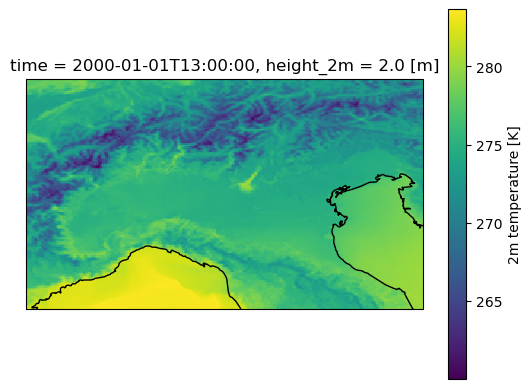

In [5]:
ax=plt.axes(projection=ccrs.PlateCarree())
ds.isel(time=12).tas.plot()
ax.coastlines()

In [7]:
gripho = f"/mnt/data/lcesarini/gripho-v1_1h_TSmin30pct_2001-2016_remap.nc"
gri_or = xr.open_dataset("/mnt/data/commonData/OBSERVATIONS/ITALY/gripho-v1_1h_TSmin30pct_2001-2016.nc").load()
gri_or

<xarray.Dataset>
Dimensions:  (time: 140256, y: 121, x: 102)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T00:22:30 ... 2016-12-31T23:00:00
    lon      (y, x) float32 6.998 7.109 7.22 7.33 ... 19.35 19.48 19.61 19.74
    lat      (y, x) float32 36.56 36.57 36.57 36.57 ... 47.06 47.04 47.03 47.02
  * x        (x) float64 4.05e+06 4.06e+06 4.07e+06 ... 5.05e+06 5.06e+06
  * y        (y) float64 1.505e+06 1.515e+06 1.525e+06 ... 2.695e+06 2.705e+06
Data variables:
    crs      int32 1
    pr       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/22)
    CDI:                            Climate Data Interface version 1.9.7.1 (h...
    history:                        Wed Apr 29 12:04:05 2020: cdo -s -C -O -z...
    source:                         Precipitation data from in-situ stations ...
    institution:                    ICTP - International Centre for Theoretic...
    Conventions:                    CF-1.7
    crs:                            +proj=laea +lat_0=52 +lon_0=10 +x_0=43210...
    ...                             ...
    title:                          GRIPHO - GRidded Italian Precipitation Ho...
    contact:                        afantini@ictp.it
    references:                     Fantini et al. (2019, in publication)
    version:                        v1.0
    years_available:                2001-2016
    CDO:                            Climate Data Operators version 1.9.7.1 (h...

In [8]:
WH=0
for SEAS in ['JJA']:
    dict_metrics={}

    for name,mdl in tqdm(zip(['GRIPHO'],[gri_or])):
        
        if WH:
            dict_0={name:compute_metrics(get_season(mdl,season=SEAS),meters=True,quantile=0.999,wethours=WH)}
            
            dict_metrics.update(dict_0)
        else:
            dict_0={name:compute_metrics(get_season(mdl,season=SEAS),meters=True,quantile=0.999)}
            
            dict_metrics.update(dict_0)

1it [00:10, 10.36s/it]


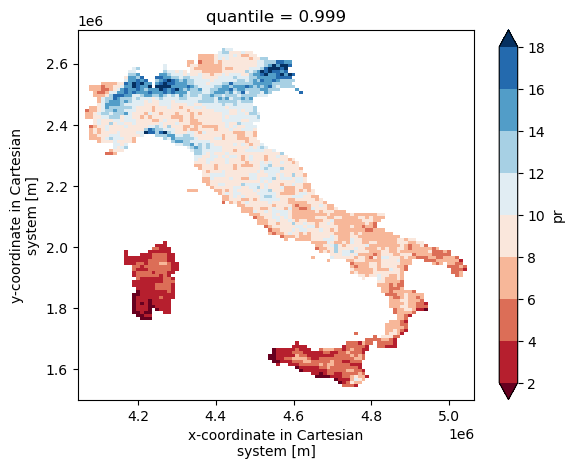

In [20]:
dict_metrics['GRIPHO'][3].plot(cmap='RdBu',levels=np.arange(2,19,2),add_colorbar=True)

In [22]:
def clip_ds(ds,xmin,xmax,ymin,ymax):
    
    if 'lat' in list(ds.coords):
        ds_clipped=ds.where((ds.lon >= xmin) & (ds.lon <= xmax) & 
                            (ds.lat >= ymin) & (ds.lat <= ymax), drop=True)
    elif 'x' in list(ds.coords):
        ds_clipped=ds.where((ds.lon >= xmin) & (ds.lon <= xmax) & 
                            (ds.lat >= ymin) & (ds.lat <= ymax), drop=True)
    elif 'longitude' in list(ds.coords):
        ds_clipped=ds.where((ds.lon >= xmin) & (ds.lon <= xmax) & 
                            (ds.lat >= ymin) & (ds.lat <= ymax), drop=True)
    return ds_clipped


In [13]:
for idx,(mdl,metrics) in enumerate(zip(dict_metrics['GRIPHO'],['f','i','v','q'])):
        mdl.to_netcdf(f"/home/lcesarini/2022_resilience/output/{SEAS}/GRIPHO_{metrics}_{np.int8(WH)}.nc")


In [ ]:
clipped_heavy_gripho=clip_ds(dict_metrics['GRIPHO'][3],10.4048,13.0998,44.70745,47.09988)

In [35]:
from resilience.utils import get_palettes
p1,p2,p3=get_palettes()

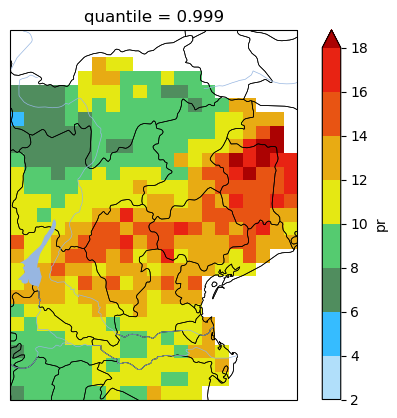

In [36]:
ax=plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=52,
                                                      central_longitude=10,
                                                      false_easting=4321000,
                                                      false_northing=3210000))

clipped_heavy_gripho.plot(ax=ax,cmap=p3,levels=np.arange(2,19,2),add_colorbar=True)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'),linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale('10m'),linewidth=0.5)
ax.add_feature(cfeature.RIVERS,linewidth=0.5)
ax.add_feature(cfeature.LAKES,linewidth=0.5)

COMPUTE DIURNAL CYCLE GRIPHO

In [40]:
clipped_or=clip_ds(gri_or,10.4048,13.0998,44.70745,47.09988)

In [47]:
q99_hourly=clipped_or.groupby(clipped_or['time.hour']).quantile(q=0.99)
q99=q99_hourly.pr.mean(dim=['y','x'])

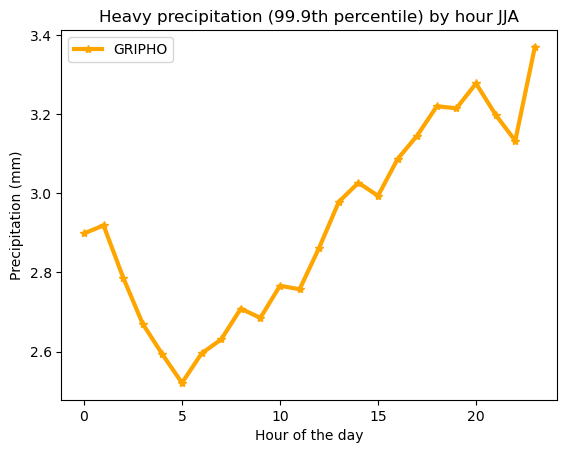

In [48]:
ax=plt.axes()
q99.plot(label="GRIPHO",ax=ax,marker='*', linewidth=3,color='orange')
ax.set_title("Heavy precipitation (99.9th percentile) by hour JJA")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Precipitation (mm)")
plt.legend()


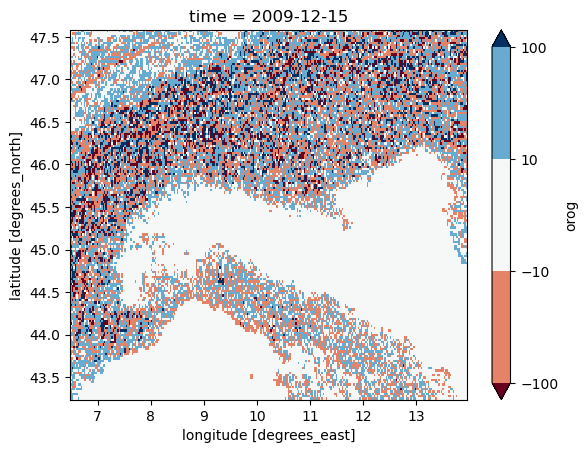

In [7]:
oro_eth=xr.load_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ETH/orog_ALP3_ETH_fx.nc")
oro_cnrm=xr.load_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/orog_ALP-3_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-AROME41t1_fx.nc")
oro_ictp=xr.load_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ICTP/orog_ALP-3_ECMWF-ERAINT_evaluation_r0i0p0_ICTP-RegCM4-7_fpsconv-x2yn2-v1_fx.nc")
diff_oro=oro_cnrm-oro_eth

diff_oro.orog.plot(levels=[-100,-10,10,100],cmap="RdBu")

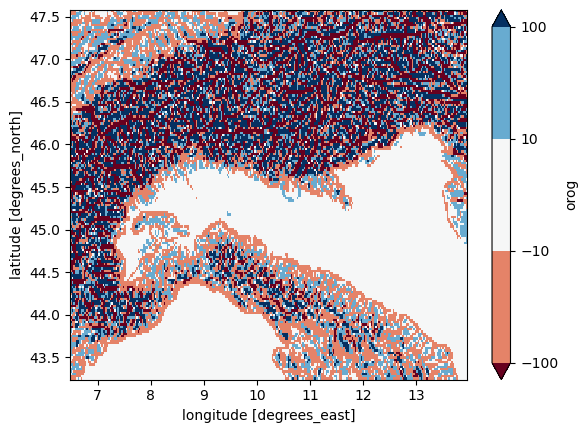

In [9]:
diff_oro=oro_cnrm-oro_ictp

diff_oro.orog.plot(levels=[-100,-10,10,100],cmap="RdBu")

In [11]:
oro_ictp_or=xr.load_dataset("/mnt/data/gfosser/DATA_FPS/orog_ALP-3_ECMWF-ERAINT_evaluation_r0i0p0_ICTP-RegCM4-7_fpsconv-x2yn2-v1_fx.nc")
oro__eth_or=xr.load_dataset("/mnt/data/gfosser/DATA_FPS/orog_ALP3_ETH_fx.nc")

In [14]:
oro_ictp_or.crs

<xarray.DataArray 'crs' ()>
array(1, dtype=int32)
Attributes:
    proj4_params:                   +proj=lcc +lat_1=41.00 +lat_2=48.00 +lat_...
    grid_mapping_name:              lambert_conformal_conic
    standard_parallel:              [41. 48.]
    longitude_of_central_meridian:  8.062
    latitude_of_projection_origin:  45.441
    semi_major_axis:                6371229.0
    inverse_flattening:             0.0
    false_easting:                  -1500.0
    false_northing:                 -1500.0
    CoordinateTransformType:        Projection
    CoordinateAxisTypes:            GeoX GeoY

In [15]:
oro__eth_or.rotated_pole

<xarray.DataArray 'rotated_pole' ()>
array(1, dtype=int32)
Attributes:
    long_name:                  coordinates of the rotated North Pole
    grid_mapping_name:          rotated_latitude_longitude
    grid_north_pole_latitude:   43.0
    grid_north_pole_longitude:  -170.0

In [22]:
oro_ictp_or.crs.longitude_of_central_meridian

8.062

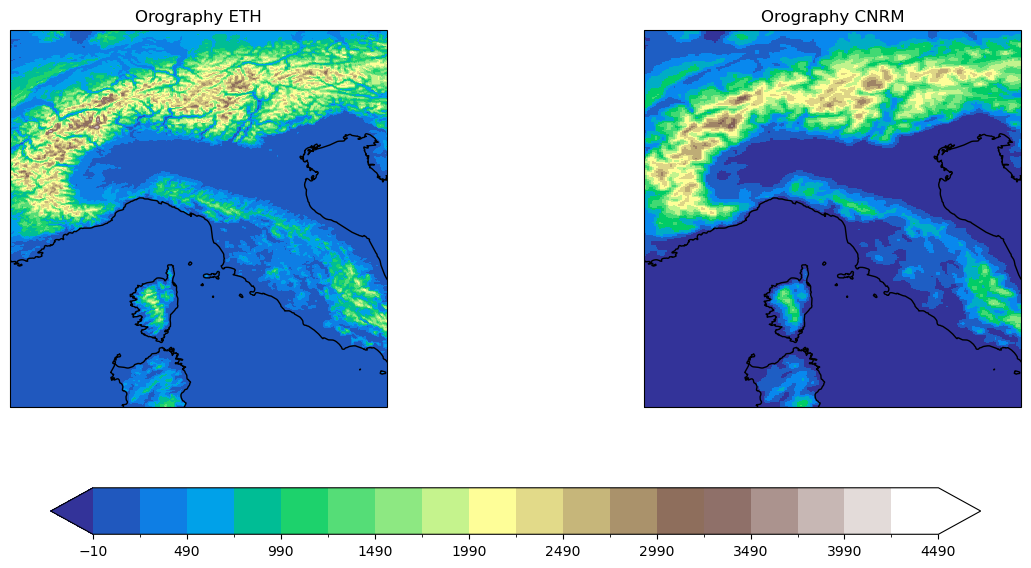

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7], subplot_kw={"projection":ccrs.PlateCarree()})

thin = 50

plt.sca(ax1)
pcm=oro__eth_or.isel(time=0).orog.plot.pcolormesh(cmap='terrain', 
                                                  levels=np.arange(-10,4500,250),
                                                  ax=ax1,add_colorbar=False,
                                                  transform=ccrs.RotatedPole(pole_longitude=-170,pole_latitude=43))
ax1.set_title('Orography ETH')
ax1.set_extent([6,14,40,48])

plt.sca(ax2)
oro_ictp_or.orog.plot.pcolormesh(cmap='terrain', 
                                 levels=np.arange(0,4500,250),
                                 ax=ax2,add_colorbar=False,
                                 transform=ccrs.LambertConformal(central_longitude=oro_ictp_or.crs.longitude_of_central_meridian,
                                                                 central_latitude=oro_ictp_or.crs.latitude_of_projection_origin,
                                                                 false_easting=oro_ictp_or.crs.false_easting,
                                                                 false_northing=oro_ictp_or.crs.false_northing,
                                                                 standard_parallels=[41,48]))
ax2.set_title('Orography CNRM')
ax2.set_extent([6,14,40,48])

fig.colorbar(pcm,ax=[ax1,ax2], 
            extend='both', 
            orientation='horizontal',
            shrink=0.8)


ax1.coastlines()
ax2.coastlines()

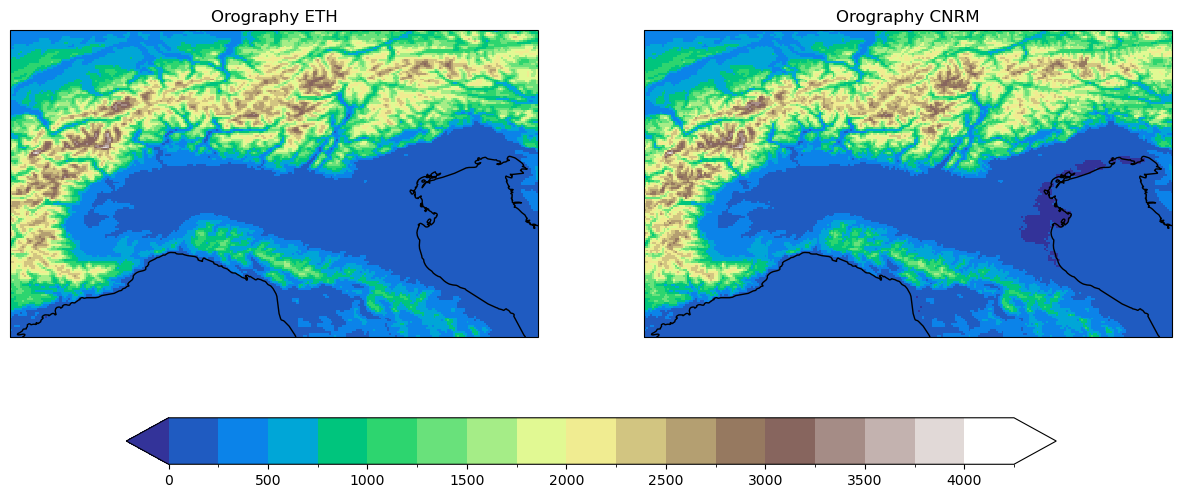

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7], subplot_kw={"projection":ccrs.PlateCarree()})

thin = 50

plt.sca(ax1)
pcm=oro_eth.isel(time=0).orog.plot.pcolormesh(cmap='terrain', levels=np.arange(0,4500,250),ax=ax1,add_colorbar=False)
ax1.set_title('Orography ETH')


plt.sca(ax2)
oro_cnrm.orog.plot.pcolormesh(cmap='terrain', levels=np.arange(0,4500,250),ax=ax2,add_colorbar=False)
ax2.set_title('Orography CNRM')
fig.colorbar(pcm,ax=[ax1,ax2], 
            extend='both', 
            orientation='horizontal',
            shrink=0.8)


ax1.coastlines()
ax2.coastlines()

In [2]:
uas_eth =xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/ETH/CPM/uas/uas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_COSMO-pompa_5.0_2019.1_1hr_200001010030_200012312330.nc").isel(time=12).load()
vas_eth =xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/ETH/CPM/vas/vas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_COSMO-pompa_5.0_2019.1_1hr_200001010030_200012312330.nc").isel(time=12).load()
# uas_mohc=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/MOHC/CPM/uas/uas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HadREM3-RA-UM10.1_fpsconv-x0n1-v1_day_20000101-20001231.nc").isel(time=12).load()
# vas_mohc=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/MOHC/CPM/vas/vas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HadREM3-RA-UM10.1_fpsconv-x0n1-v1_day_20000101-20001231.nc").isel(time=12).load()
uas_hcli=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/HCLIMcom/CPM/uas/uas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_1hr_200001010000-200012312300.nc").isel(time=12).load()
vas_hcli=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/HCLIMcom/CPM/vas/vas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_1hr_200001010000-200012312300.nc").isel(time=12).load()
uas_cnrm=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/uas/uas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_CNRM-AROME41t1_fpsconv-x2yn2-v1_1hr_200001010030-200012312330.nc").isel(time=12).load()
vas_cnrm=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/vas/vas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_CNRM-AROME41t1_fpsconv-x2yn2-v1_1hr_200001010030-200012312330.nc").isel(time=12).load()
print(uas_hcli.dims,vas_hcli.dims)

Frozen({'y': 485, 'x': 573}) Frozen({'y': 485, 'x': 573})


In [6]:
cnrm_pr=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_CNRM-AROME41t1_fpsconv-x2yn2-v1_1hr_201601010030-201612312330.nc")
cnrm_pr

<xarray.Dataset>
Dimensions:            (time: 8784, y: 487, x: 587, nv4: 4, axis_nbnds: 2)
Coordinates:
  * time               (time) datetime64[ns] 2016-01-01T00:29:59.999997184 .....
    lon                (y, x) float64 ...
    lat                (y, x) float64 ...
  * x                  (x) float64 0.0 2.5 5.0 ... 1.46e+03 1.462e+03 1.465e+03
  * y                  (y) float64 0.0 2.5 5.0 ... 1.21e+03 1.212e+03 1.215e+03
Dimensions without coordinates: nv4, axis_nbnds
Data variables:
    lon_bnds           (y, x, nv4) float64 ...
    lat_bnds           (y, x, nv4) float64 ...
    pr                 (time, y, x) float32 ...
    Lambert_Conformal  |S1 ...
    time_bnds          (time, axis_nbnds) datetime64[ns] ...
Attributes: (12/33)
    Conventions:                    CF-1.4
    institution:                    CNRM (Centre National de Recherches Meteo...
    contact:                        contact.aladin-cordex@meteo.fr
    comment:                        Please use the following reference for th...
    experiment_id:                  evaluation
    experiment:                     Evaluation run with forcing from downscal...
    ...                             ...
    grid_mapping_name:              lambert_conformal_conic
    longitude_of_central_meridian:  8.48f
    standard_parallel:              44.88f
    latitude_of_projection_origin:  44.88f
    tracking_id:                    108945dd-a63c-41f4-807f-c3f54d8288f2
    CMORisation_date:               02-12-2022 13:55:31

In [10]:
cnrm_pr.lon.values

array([[ 2.05000e-02,  4.92000e-02,  7.78000e-02, ...,  1.68822e+01,
         1.69108e+01,  1.69395e+01],
       [ 1.75000e-02,  4.62000e-02,  7.49000e-02, ...,  1.68851e+01,
         1.69138e+01,  1.69425e+01],
       [ 1.45000e-02,  4.32000e-02,  7.19000e-02, ...,  1.68881e+01,
         1.69168e+01,  1.69455e+01],
       ...,
       [-1.72870e+00, -1.69420e+00, -1.65980e+00, ...,  1.86198e+01,
         1.86542e+01,  1.86887e+01],
       [-1.73310e+00, -1.69860e+00, -1.66410e+00, ...,  1.86241e+01,
         1.86586e+01,  1.86931e+01],
       [-1.73740e+00, -1.70290e+00, -1.66840e+00, ...,  1.86284e+01,
         1.86629e+01,  1.86974e+01]])

In [9]:
uas_cnrm.lon.values

array([[ 1.99999996e-02,  5.00000007e-02,  7.99999982e-02, ...,
         1.68799992e+01,  1.69099998e+01,  1.69400005e+01],
       [ 1.99999996e-02,  5.00000007e-02,  7.00000003e-02, ...,
         1.68899994e+01,  1.69099998e+01,  1.69400005e+01],
       [ 9.99999978e-03,  3.99999991e-02,  7.00000003e-02, ...,
         1.68899994e+01,  1.69200001e+01,  1.69500008e+01],
       ...,
       [-1.73000002e+00, -1.69000006e+00, -1.65999997e+00, ...,
         1.86200008e+01,  1.86499996e+01,  1.86900005e+01],
       [-1.73000002e+00, -1.70000005e+00, -1.65999997e+00, ...,
         1.86200008e+01,  1.86599998e+01,  1.86900005e+01],
       [-1.74000001e+00, -1.70000005e+00, -1.66999996e+00, ...,
         1.86299992e+01,  1.86599998e+01,  1.87000008e+01]])

In [11]:
vas_cnrm.lon.values

array([[ 1.99999996e-02,  5.00000007e-02,  7.99999982e-02, ...,
         1.68799992e+01,  1.69099998e+01,  1.69400005e+01],
       [ 1.99999996e-02,  5.00000007e-02,  7.00000003e-02, ...,
         1.68899994e+01,  1.69099998e+01,  1.69400005e+01],
       [ 9.99999978e-03,  3.99999991e-02,  7.00000003e-02, ...,
         1.68899994e+01,  1.69200001e+01,  1.69500008e+01],
       ...,
       [-1.73000002e+00, -1.69000006e+00, -1.65999997e+00, ...,
         1.86200008e+01,  1.86499996e+01,  1.86900005e+01],
       [-1.73000002e+00, -1.70000005e+00, -1.65999997e+00, ...,
         1.86200008e+01,  1.86599998e+01,  1.86900005e+01],
       [-1.74000001e+00, -1.70000005e+00, -1.66999996e+00, ...,
         1.86299992e+01,  1.86599998e+01,  1.87000008e+01]])

In [3]:
def isEqual(U,V):
    all_lat=np.all(U["rlat" if "rlat" in U.dims else "y"] == V["rlat" if "rlat" in U.dims else "y"]).item()
    all_lon=np.all(U["rlon" if "rlon" in U.dims else "x"] == V["rlon" if "rlon" in U.dims else "x"]).item()

    if all_lon & all_lat:
        return print("ALL equal")
    else:
        return print("some differences")

isEqual(uas_eth,vas_eth)
isEqual(uas_hcli,vas_hcli)
isEqual(uas_cnrm,vas_cnrm)


ALL equal
ALL equal
ALL equal


Text(0.5, 0.98, 'Grid-relative 10-m U component and wind barbs')

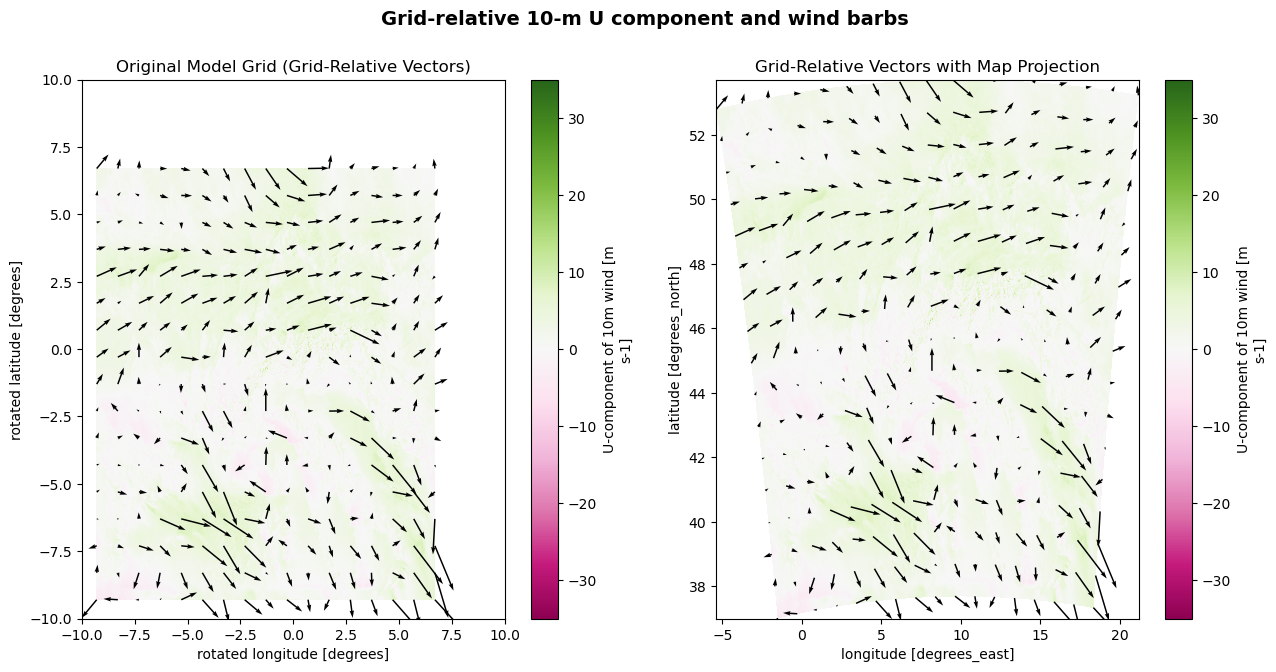

In [4]:
X,Y = np.meshgrid(uas_eth.rlon.values, uas_eth.rlat.values)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7])

thin = 50

plt.sca(ax1)
uas_eth.uas.plot.pcolormesh(cmap='PiYG', vmax=35, vmin=-35)
# plt.colorbar(orientation='horizontal', pad=.1, shrink=.8)
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
ax1.set_title('Original Model Grid (Grid-Relative Vectors)')
ax1.quiver(X[::50,::50],Y[::50,::50],uas_eth.uas.values[::50,::50],vas_eth.vas.values[::50,::50],
          color='k',
        #   length=5,
          label='Grid-Relative')

plt.sca(ax2)
uas_eth.uas.plot.pcolormesh(x="lon", y="lat", cmap='PiYG', vmax=35, vmin=-35)
# plt.colorbar(orientation='horizontal', pad=.1, shrink=.8)
ax2.set_title('Grid-Relative Vectors with Map Projection')
ax2.quiver(uas_eth.lon[::thin,::thin], uas_eth.lat[::thin,::thin], uas_eth.uas.values[::50,::50],vas_eth.vas.values[::50,::50],
          color='k',
        #   length=5,
          label='Grid-Relative')


plt.suptitle('Grid-relative 10-m U component and wind barbs', fontsize=14, fontweight='semibold')

In [42]:
import cartopy.crs as ccrs
uas_eth.rotated_pole

<xarray.DataArray 'rotated_pole' ()>
array(1, dtype=int32)
Coordinates:
    time        datetime64[ns] 2000-01-01T13:00:00
    height_10m  float32 10.0
Attributes:
    long_name:                  coordinates of the rotated North Pole
    grid_mapping_name:          rotated_latitude_longitude
    grid_north_pole_latitude:   43.0
    grid_north_pole_longitude:  -170.0

Text(0.5, 0.98, 'Grid-relative 10-m U component and wind barbs')

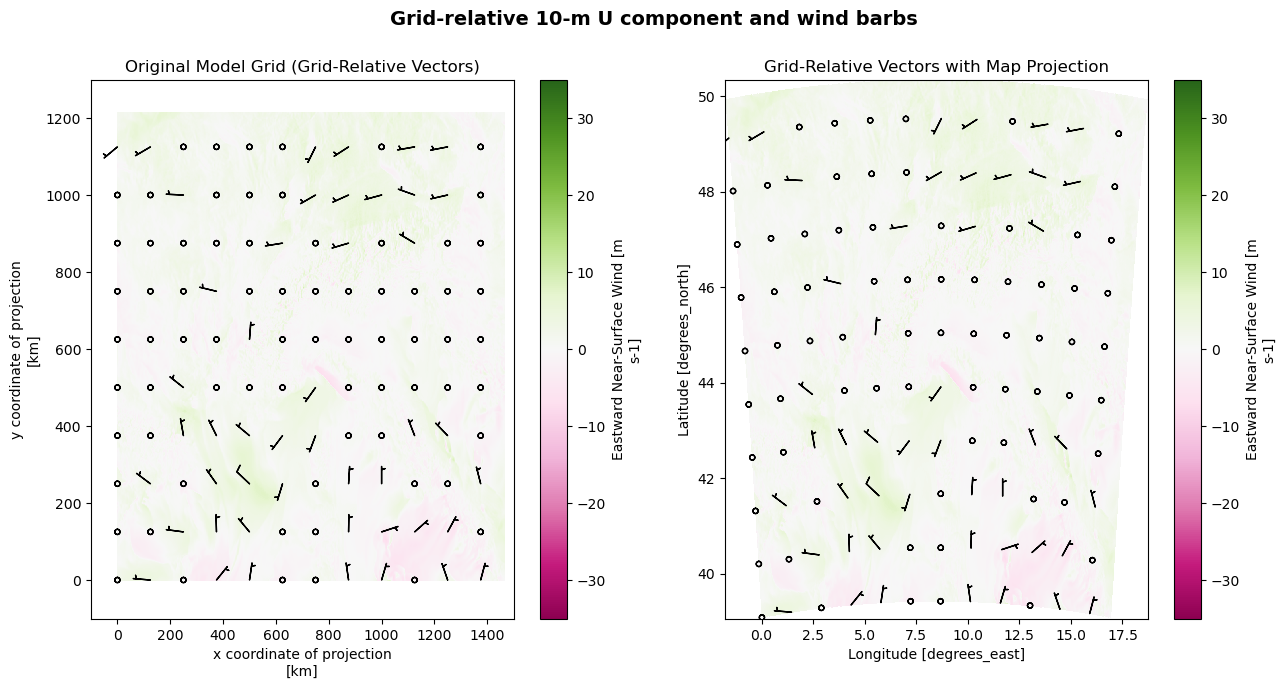

In [5]:
X_cnrm,Y_cnrm = np.meshgrid(uas_cnrm.x.values, uas_cnrm.y.values)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,7])

thin = 50

plt.sca(ax1)
uas_cnrm.uas.plot.pcolormesh(cmap='PiYG', vmax=35, vmin=-35)
# plt.colorbar(orientation='horizontal', pad=.1, shrink=.8)
ax1.set_xlim([-100,1500])
ax1.set_ylim([-100,1300])
ax1.set_title('Original Model Grid (Grid-Relative Vectors)')
ax1.barbs(X_cnrm[::50,::50],Y_cnrm[::50,::50],uas_cnrm.uas.values[::50,::50],vas_cnrm.vas.values[::50,::50],
          color='k',
          length=5,
          label='Grid-Relative')

plt.sca(ax2)
uas_cnrm.uas.plot.pcolormesh(x="lon", y="lat", cmap='PiYG', vmax=35, vmin=-35)
# plt.colorbar(orientation='horizontal', pad=.1, shrink=.8)
ax2.set_title('Grid-Relative Vectors with Map Projection')
ax2.barbs(uas_cnrm.lon[::50,::50], uas_cnrm.lat[::50,::50], uas_cnrm.uas.values[::50,::50],vas_cnrm.vas.values[::50,::50],
          color='k',
          length=5,
          label='Grid-Relative')


plt.suptitle('Grid-relative 10-m U component and wind barbs', fontsize=14, fontweight='semibold')

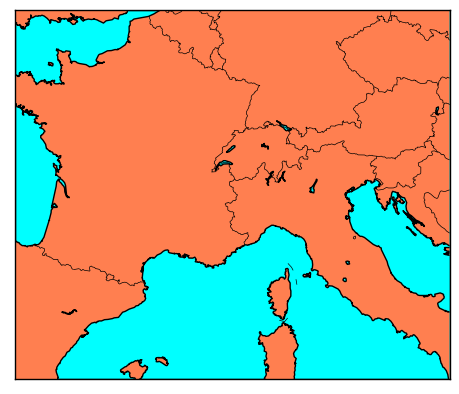

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
m = Basemap(llcrnrlon=-2,llcrnrlat=39,urcrnrlon=18,urcrnrlat=51,
            resolution='i',projection='tmerc',lat_0=45,lon_0=8)# draw coastlines.
m.drawcoastlines()
m.drawcountries()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()

In [35]:
uas_cnrm.Lambert_Conformal.attrs

{'grid_mapping_name': 'lambert_conformal_conic',
 'longitude_of_central_meridian': 8.48,
 'standard_parallel': 44.88,
 'latitude_of_projection_origin': 44.88}

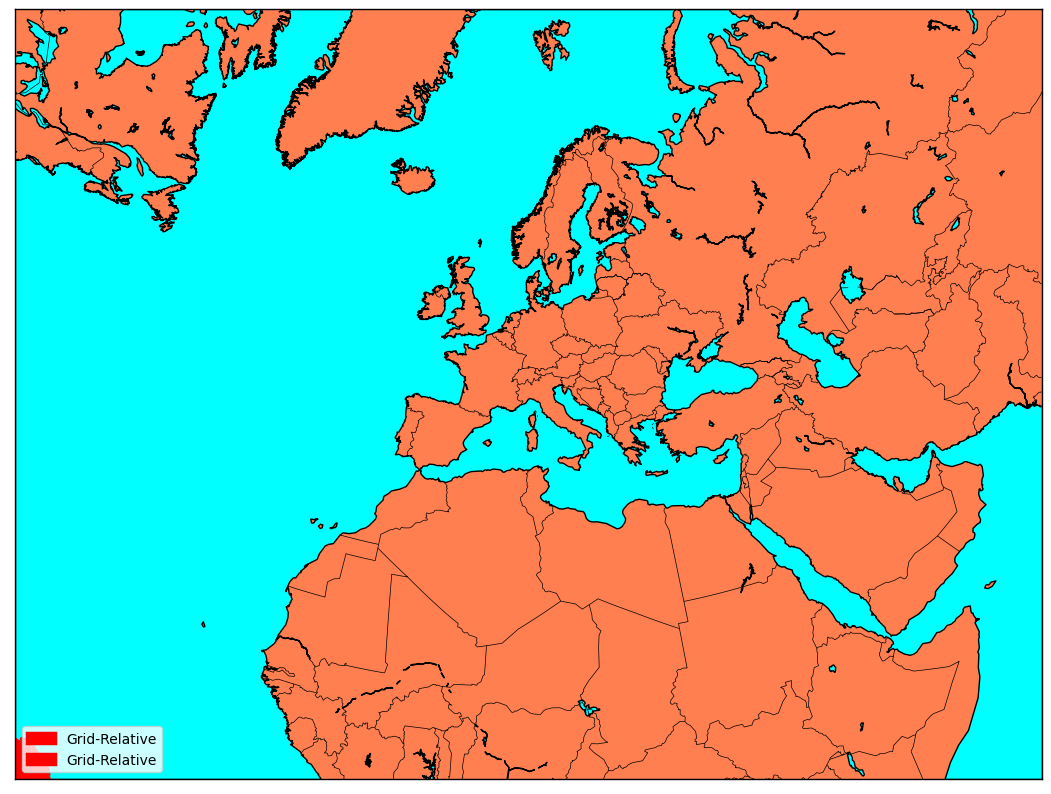

In [34]:
plt.figure(figsize=[15,10])
m = Basemap(#width=12000000,height=9000000,
            #llcrnrlon=-2,llcrnrlat=39,urcrnrlon=18,urcrnrlat=51,
            # rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='lcc',
            lat_1=44.88,
        #     lat_2=55,
            lat_0=44.88,
            lon_0=8.48)# draw coastlines.
m.drawcoastlines()
m.drawcountries()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')



thin = 11

# Plot the Grid-Relative Winds
m.barbs(X_cnrm[::thin,::thin],Y_cnrm[::thin,::thin],uas_cnrm.uas.values[::thin,::thin],vas_cnrm.vas.values[::thin,::thin],
        color='r',
        # length=6,
        linewidth=2.5,
        latlon=False,
        label='Grid-Relative')

# Plot the Earth-Relative Winds
# m.barbs(uas_cnrm.lon[::thin,::thin], uas_cnrm.lat[::thin,::thin], uas_cnrm.uas.values[::thin,::thin],vas_cnrm.vas.values[::thin,::thin],
#         color='b',
#         # length=6,
#         latlon=True,
#         label='Earth-Relative')

# # Plot the Earth-Relative Winds ROTATED TO MAP PROJECTION. Note: rotating has no effect on the latlon grid.
# U_rg_rot, V_rg_rot = m.rotate_vector(U_rg, V_rg, lon_rg, lat_rg) 
# m.barbs(lon_rg[::thin,::thin], lat_rg[::thin,::thin], U_rg_rot[::thin,::thin], V_rg_rot[::thin,::thin],
#         color='r',
#         length=6,
#         linewidth=.5,
#         latlon=True,
#         label='Earth-Relative ROTATED')


plt.legend()

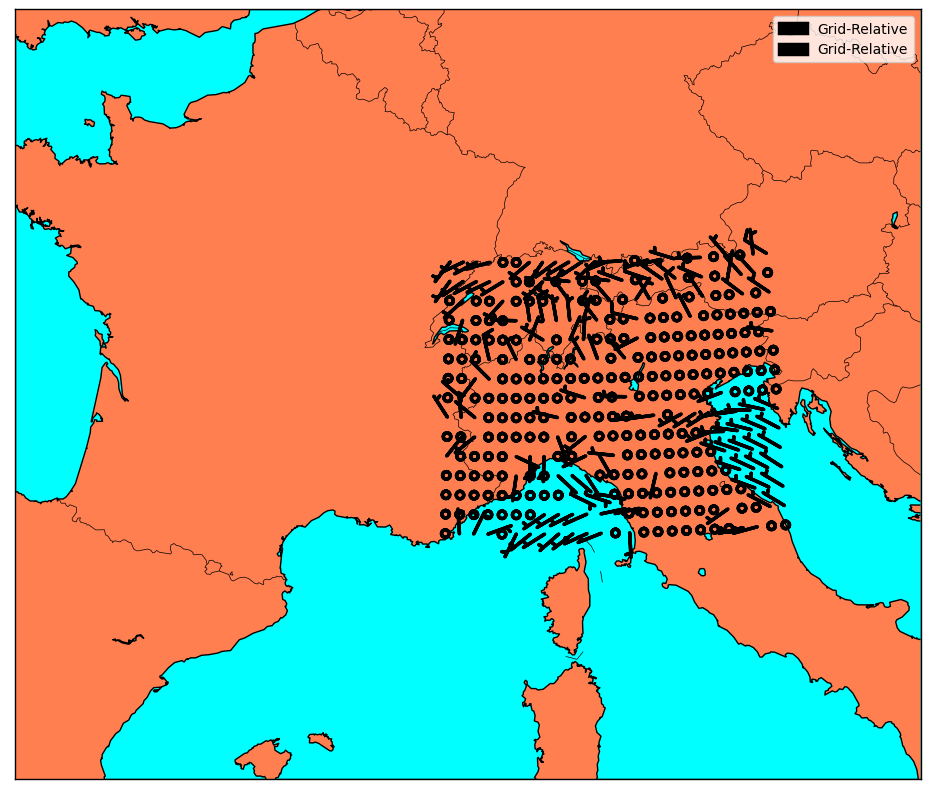

In [12]:
uas_eth_regrid=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ETH/CPM/uas/uas_ETH_ECMWF-ERAINT_200001010030_200012312330.nc").isel(time=12)
vas_eth_regrid=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ETH/CPM/vas/vas_ETH_ECMWF-ERAINT_200001010030_200012312330.nc").isel(time=12)

X_eth_r,Y_eth_r = np.meshgrid(uas_eth_regrid.lon.values, vas_eth_regrid.lat.values)
X_eth,Y_eth = np.meshgrid(uas_eth.rlon.values, uas_eth.rlat.values)
plt.figure(figsize=[15,10])
m = Basemap(llcrnrlon=-2,llcrnrlat=39,urcrnrlon=18,urcrnrlat=51,
            resolution='i',projection='tmerc',lat_0=45,lon_0=8)# draw coastlines.
m.drawcoastlines()
m.drawcountries()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')



thin = 11

# Plot the Grid-Relative Winds
m.barbs(X_eth_r[::thin,::thin],Y_eth_r[::thin,::thin],uas_eth_regrid.uas.values[::thin,::thin],vas_eth_regrid.vas.values[::thin,::thin],
        color='k',
        length=6,
        linewidth=2.5,
        latlon=True,
        label='Grid-Relative')


# # Plot the Earth-Relative Winds ROTATED TO MAP PROJECTION. Note: rotating has no effect on the latlon grid.
# U_rg_rot, V_rg_rot = m.rotate_vector(U_rg, V_rg, lon_rg, lat_rg) 
# m.barbs(lon_rg[::thin,::thin], lat_rg[::thin,::thin], U_rg_rot[::thin,::thin], V_rg_rot[::thin,::thin],
#         color='r',
#         length=6,
#         linewidth=.5,
#         latlon=True,
#         label='Earth-Relative ROTATED')


plt.legend()

In [71]:
uas_eth_regrid

<xarray.Dataset>
Dimensions:     (bnds: 2, lon: 272, lat: 158)
Coordinates:
    time        datetime64[ns] 2000-01-01T13:00:00
  * lon         (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * lat         (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
    height_10m  float32 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (bnds) datetime64[ns] ...
    uas         (lat, lon) float32 -0.5862 -0.6911 -0.7791 ... 3.374 3.463 3.884
Attributes:
    CDI:             Climate Data Interface version 1.9.8 (https://mpimet.mpg...
    Conventions:     CF-1.4
    history:         Fri Feb 10 15:28:45 2023: cdo remapycon,newcommongrid.tx...
    conventionsURL:  http://www.cfconventions.org/
    creation_date:   2019-03-01 16:22:26
    NCO:             netCDF Operators version 4.8.1 (Homepage = http://nco.sf...
    CDO:             Climate Data Operators version 1.9.8 (https://mpimet.mpg...

In [74]:
uas_eth.uas.where((uas_eth.lon > 6.5) & (uas_eth.lon < 13.96) & (uas_eth.lat > 43.25) & (uas_eth.lat < 47.57),drop=True )

<xarray.DataArray 'uas' (rlat: 219, rlon: 272)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2000-01-01T13:00:00
    lon         (rlat, rlon) float32 6.522 6.549 6.577 ... 14.21 14.24 14.27
    lat         (rlat, rlon) float32 43.2 43.2 43.21 43.21 ... 47.54 47.54 47.54
  * rlon        (rlon) float32 -2.54 -2.52 -2.5 -2.48 ... 2.82 2.84 2.86 2.88
  * rlat        (rlat) float32 -3.74 -3.72 -3.7 -3.68 ... 0.56 0.58 0.6 0.62
    height_10m  float32 10.0
Attributes:
    standard_name:  grid_eastward_wind
    long_name:      U-component of 10m wind
    units:          m s-1
    grid_mapping:   rotated_pole

In [78]:
uas_eth_2=uas_eth.uas.where((uas_eth.lon > 6.5) & (uas_eth.lon < 13.96) & (uas_eth.lat > 43.25) & (uas_eth.lat < 47.57),drop=True )
vas_eth_2=vas_eth.vas.where((uas_eth.lon > 6.5) & (uas_eth.lon < 13.96) & (uas_eth.lat > 43.25) & (uas_eth.lat < 47.57),drop=True )

(array([8.78707981e-05, 1.75741596e-04, 2.63612394e-04, 5.27226039e-04,
        6.15095587e-04, 1.93315756e-03, 3.77844432e-03, 9.75365859e-03,
        1.17746870e-02, 1.11595914e-02, 9.05070294e-03, 1.03687665e-02,
        1.08959790e-02, 9.92940019e-03, 9.84152939e-03, 1.20383136e-02,
        1.38835861e-02, 1.61682269e-02, 1.73105678e-02, 1.89800924e-02,
        2.65369968e-02, 3.11941333e-02, 3.91903992e-02, 5.83462100e-02,
        7.87322818e-02, 1.02369510e-01, 1.43229443e-01, 1.83474335e-01,
        2.36021034e-01, 2.49904624e-01, 2.63261009e-01, 2.56846438e-01,
        2.22488927e-01, 2.02454409e-01, 1.76796098e-01, 1.64142748e-01,
        1.66427292e-01, 1.60891527e-01, 1.58343178e-01, 1.65372940e-01,
        1.62912460e-01, 1.53071112e-01, 1.37342057e-01, 1.22316151e-01,
        1.05181470e-01, 1.03423929e-01, 1.03687542e-01, 8.57618990e-02,
        8.78709023e-02, 7.79413980e-02, 6.29155660e-02, 6.57273570e-02,
        7.09117341e-02, 6.77483854e-02, 6.46729074e-02, 6.203678

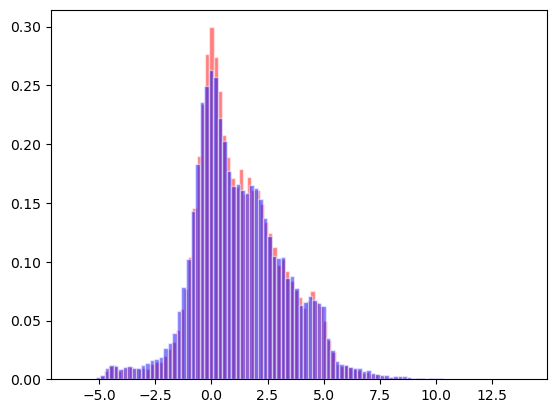

In [76]:
plt.hist(uas_eth_regrid.uas.values.reshape(-1) ,bins=100,ec="white",color="red",alpha=0.5,density=True)
plt.hist(uas_eth.uas.where((uas_eth.lon > 6.5) & (uas_eth.lon < 13.96) & (uas_eth.lat > 43.25) & (uas_eth.lat < 47.57),drop=True ).\
         values.reshape(-1),bins=100,ec="white",color="blue",alpha=0.5, density=True)

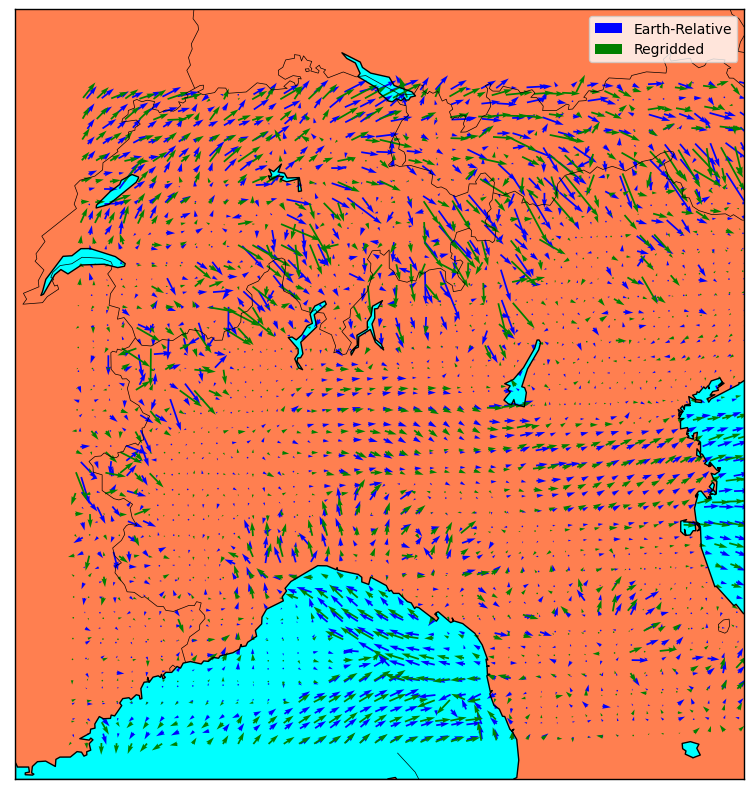

In [82]:
X_eth,Y_eth = np.meshgrid(uas_eth.rlon.values, uas_eth.rlat.values)

plt.figure(figsize=[15,10])
m = Basemap(llcrnrlon=6,llcrnrlat=43,urcrnrlon=13,urcrnrlat=48,
            resolution='i',projection='tmerc',lat_0=45,lon_0=8)# draw coastlines.
# m = Basemap(llcrnrlon=-2,llcrnrlat=39,urcrnrlon=18,urcrnrlat=51,
#             resolution='i',projection='tmerc',lat_0=45,lon_0=8)# draw coastlines.
m.drawcoastlines()
m.drawcountries()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')



thin = 5

# Plot the Grid-Relative Winds
# m.quiver(X_eth[::thin,::thin],Y_eth[::thin,::thin],uas_eth.uas.values[::thin,::thin],vas_eth.vas.values[::thin,::thin],
#         color='k',
#         # length=6,
#         linewidth=2.5,
#         latlon=False,
#         label='Grid-Relative')

# Plot the Earth-Relative Winds
# m.quiver(uas_eth.lon[::thin,::thin], uas_eth.lat[::thin,::thin], uas_eth.uas.values[::thin,::thin],vas_eth.vas.values[::thin,::thin],
#         color='b',
#         # length=6,
#         latlon=True,
#         label='Earth-Relative')

m.quiver(uas_eth_2.lon[::thin,::thin], uas_eth_2.lat[::thin,::thin], uas_eth_2.values[::thin,::thin],vas_eth_2.values[::thin,::thin],
        color='b',
        # length=6,
        latlon=True,
        label='Earth-Relative')

m.quiver(X_eth_r[::thin,::thin],Y_eth_r[::thin,::thin],uas_eth_regrid.uas.values[::thin,::thin],vas_eth_regrid.vas.values[::thin,::thin],
        color='g',
        # length=6,
        # linewidth=2.5,
        latlon=True,
        label='Regridded')

# Plot the Earth-Relative Winds ROTATED TO MAP PROJECTION. Note: rotating has no effect on the latlon grid.
# U_rg_rot, V_rg_rot = m.rotate_vector(U_rg, V_rg, lon_rg, lat_rg) 
# m.barbs(lon_rg[::thin,::thin], lat_rg[::thin,::thin], U_rg_rot[::thin,::thin], V_rg_rot[::thin,::thin],
#         color='r',
#         length=6,
#         linewidth=.5,
#         latlon=True,
#         label='Earth-Relative ROTATED')


plt.legend()

In [30]:
SEAS="JJA"
m="i"
ds_sta=xr.open_dataset(f"output/{SEAS}/STATIONS_{m}.nc")
ds_cpm=xr.open_dataset(f"output/{SEAS}/ENSEMBLE_{m}.nc") 

ds_sph=xr.open_dataset(f"output/{SEAS}/SPHERA_{m}.nc")

ds_vhr=xr.open_dataset(f"output/{SEAS}/CMCC_VHR_{m}.nc")


mask=xr.open_dataset("data/mask_stations_nan_common.nc")

sea_mask=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/sftlf_ALP-3_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-AROME41t1_fx_remap.nc")


rea_sph=(ds_sph*sea_mask.sftlf).isel(lon=ds_sph.lon.isin(ds_sta.lon),lat=ds_sph.lat.isin(ds_sta.lat))

rea_vhr=(ds_vhr*sea_mask.sftlf).isel(lon=ds_vhr.lon.isin(ds_sta.lon),lat=ds_vhr.lat.isin(ds_sta.lat))

cpm_tri=(ds_cpm*sea_mask.sftlf ).isel(lon=ds_cpm.lon.isin(ds_sta.lon),lat=ds_cpm.lat.isin(ds_sta.lat))


#BIAS CPM-STATION
bias_cpm_sta=((cpm_tri - ds_sta) / ds_sta) * 100
bias_cpm_sta

<xarray.Dataset>
Dimensions:  (lon: 99, lat: 88)
Coordinates:
  * lon      (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
  * lat      (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
Data variables:
    pr       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [31]:
(~np.isnan(bias_cpm_sta.pr.values)).sum()

172

In [33]:
norm = mpl.colors.BoundaryNorm(np.arange(-50,50,10), cmap_q.N)
norm


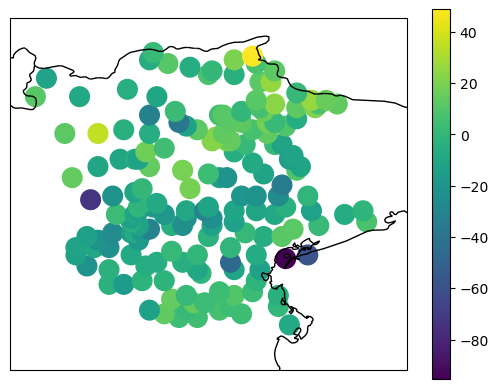

In [35]:
col=mpl.cm.get_cmap("PuOr",12)


cmap_q = (mpl.colors.ListedColormap([mpl.colors.rgb2hex(col(i)) for i in np.arange(1,12)])
        .with_extremes(over=mpl.colors.rgb2hex(col(12)), under=mpl.colors.rgb2hex(col(0))))
cmap_q.set_bad("white")

lon,lat=np.meshgrid(bias_cpm_sta.lon,bias_cpm_sta.lat)
ax = plt.subplot(projection=ccrs.PlateCarree())
pcm=ax.scatter(lon, lat,s=200,c=bias_cpm_sta.pr.values, 
               transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
plt.colorbar(pcm,norm=norm)


Ignoring index file '/mnt/data/lcesarini/test_dir.grb2.923a8.idx' incompatible with GRIB file


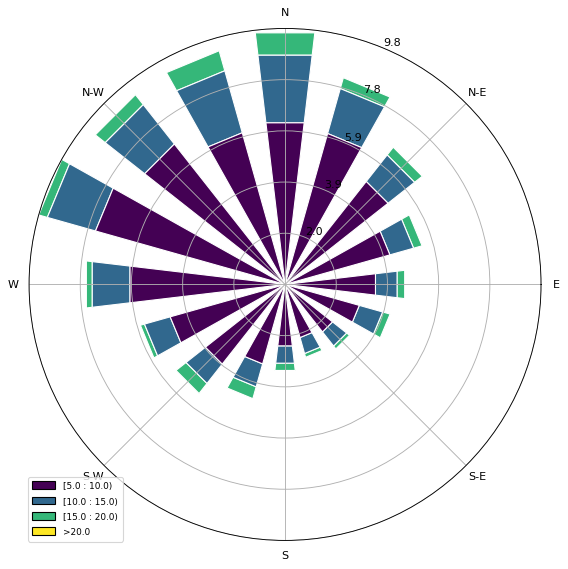

In [2]:
mw=xr.load_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/reanalysis/SPHERA/mw/mw_2009_remapped_SPHERA.nc").isel(time=np.arange(240))

dir=xr.load_dataset("/mnt/data/lcesarini/test_dir.grb2",engine='cfgrib')

d_1=dir.u10.values.reshape(-1,)
m_1=mw.mw.values.reshape(-1,)
d_1=d_1[~np.isnan(d_1)]
m_1=m_1[~np.isnan(m_1)]
# ws = np.random.random(500) * 6
# wd = np.random.random(500) * 360
from windrose import WindroseAxes 
ax = WindroseAxes.from_ax()
ax.bar(d_1, m_1, nsector=16, bins=np.arange(5,25,5), opening=0.6, edgecolor='white', normed=True)
ax.set_legend()


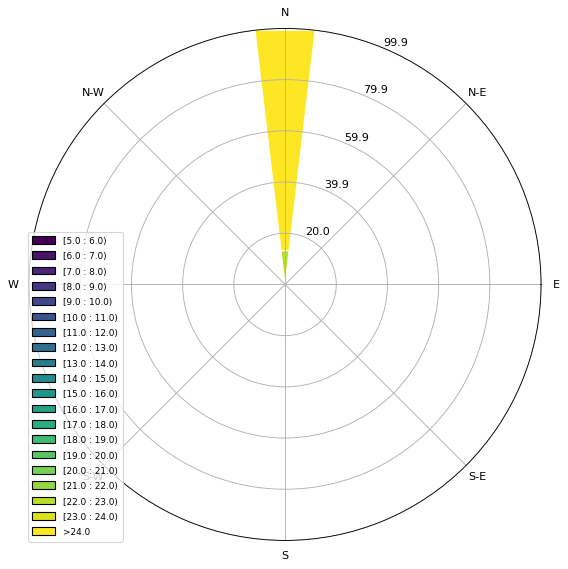

In [4]:
mw=np.loadtxt("/home/lcesarini/2022_resilience/all_vel.txt",skiprows=1)
dir_=np.loadtxt("/home/lcesarini/2022_resilience/all_dir.txt",skiprows=1)
ax = WindroseAxes.from_ax()
ax.bar(mw, dir_, nsector=16, bins=np.arange(5,25,1), opening=0.6, edgecolor='white', normed=True)
ax.set_legend()


In [66]:
radius_bin,theta_bin,=np.histogram(d_1,bins=np.arange(0,360,90))


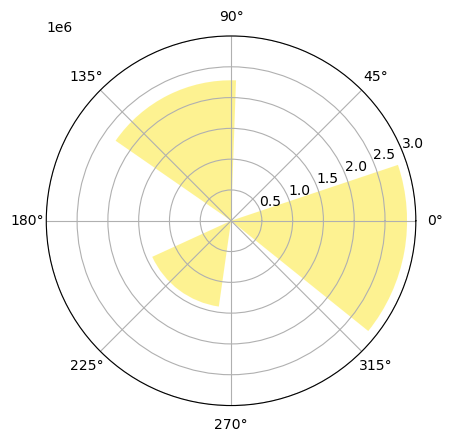

In [67]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = theta_bin
radii = np.concatenate([np.array([0]), radius_bin],axis=0)
width = np.ones(shape=theta_bin.shape[0]) #np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / theta_bin.shape[0])

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

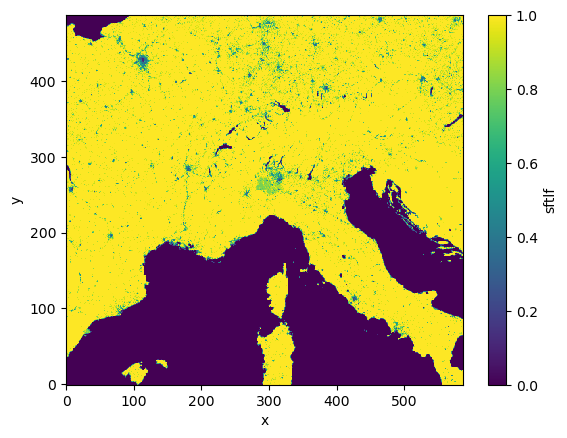

In [5]:
xr.open_dataset(ß).sftlf.plot.pcolormesh()


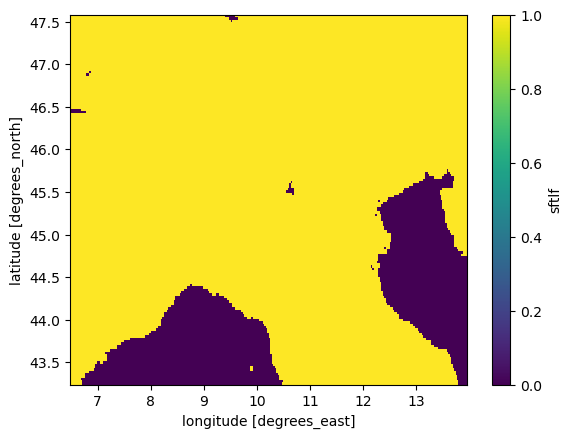

In [10]:
laf=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/sftlf_ALP-3_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-AROME41t1_fx_remap.nc")
xr.where(laf.sftlf > 0,1,0).plot.pcolormesh()

In [19]:
ds_q=xr.open_dataset(f"output/JJA/STATIONS_q.nc")


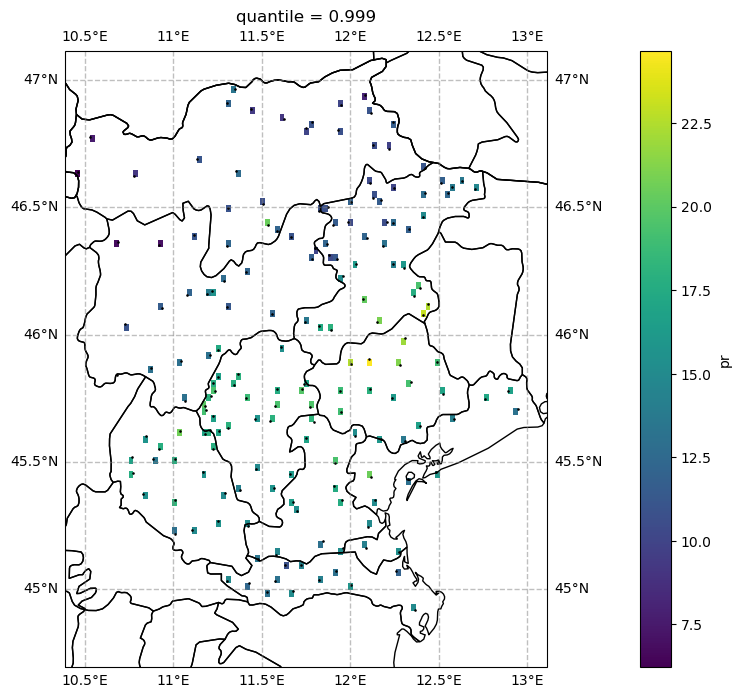

In [20]:
meta = pd.read_csv("stations/meta_stations_eval.csv")

gds=gpd.GeoDataFrame(meta,
                    geometry=gpd.points_from_xy(meta["lon"],
                                                meta["lat"], 
                    crs="EPSG:4326"))
fig=plt.figure(figsize=(24,8))
ax=plt.axes(projection=ccrs.PlateCarree())
ds_q.pr.isel(quantile=0).plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree())
gds.plot(color='black',ax=ax,markersize=0.75)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
gl = ax.gridlines(
    draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--'
)



In [2]:
ds=xr.open_dataset("/mnt/data/commonData/OBSERVATIONS/ITALY/gripho-v1_1h_TSmin30pct_2001-2016.nc")
ds

<xarray.Dataset>
Dimensions:  (time: 140256, y: 121, x: 102)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T00:22:30 ... 2016-12-31T23:00:00
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
  * x        (x) float64 4.05e+06 4.06e+06 4.07e+06 ... 5.05e+06 5.06e+06
  * y        (y) float64 1.505e+06 1.515e+06 1.525e+06 ... 2.695e+06 2.705e+06
Data variables:
    crs      int32 ...
    pr       (time, y, x) float32 ...
Attributes: (12/22)
    CDI:                            Climate Data Interface version 1.9.7.1 (h...
    history:                        Wed Apr 29 12:04:05 2020: cdo -s -C -O -z...
    source:                         Precipitation data from in-situ stations ...
    institution:                    ICTP - International Centre for Theoretic...
    Conventions:                    CF-1.7
    crs:                            +proj=laea +lat_0=52 +lon_0=10 +x_0=43210...
    ...                             ...
    title:                          GRIPHO - GRidded Italian Precipitation Ho...
    contact:                        afantini@ictp.it
    references:                     Fantini et al. (2019, in publication)
    version:                        v1.0
    years_available:                2001-2016
    CDO:                            Climate Data Operators version 1.9.7.1 (h...

In [6]:
xr.open_dataset("/mnt/data/commonData/OBSERVATIONS/EURO4M-APGD/EURO4M-APGD-1971-2008.nc")

<xarray.Dataset>
Dimensions:      (X: 243, Y: 138, time: 13880, dummy: 1)
Coordinates:
  * X            (X) float64 3.675e+06 3.68e+06 3.685e+06 ... 4.88e+06 4.885e+06
  * Y            (Y) float64 2.21e+06 2.215e+06 2.22e+06 ... 2.89e+06 2.895e+06
  * time         (time) datetime64[ns] 1971-01-01 1971-01-02 ... 2008-12-31
  * dummy        (dummy) float64 1.0
    lon          (Y, X) float32 ...
    lat          (Y, X) float32 ...
Data variables:
    pr           (time, Y, X) float32 ...
    ETRS89-LAEA  (dummy) float64 ...
Attributes:
    Conventions:               CF-1.4
    institution:               Federal Office of Meteorology and Climatology ...
    References:                Isotta, F.A. et al. 2013: The climate of daily...
    history:                   Fri Nov  1 13:32:07 2013: ncrename -v PRECIPIT...
    nco_openmp_thread_number:  1

In [37]:
mohc_07=xr.open_mfdataset(f"/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/MOHC/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HadREM3-RA-UM10.1_fpsconv-x0n1-v1_1hr_200407*").load()
mohc_06=xr.open_mfdataset(f"/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/MOHC/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HadREM3-RA-UM10.1_fpsconv-x0n1-v1_1hr_200406*").load()



In [38]:
mohc_orig=xr.merge([mohc_06,mohc_07])

In [39]:
q_mohc=mohc_orig.precipitation_flux.quantile(q=0.999,dim='time')*3600

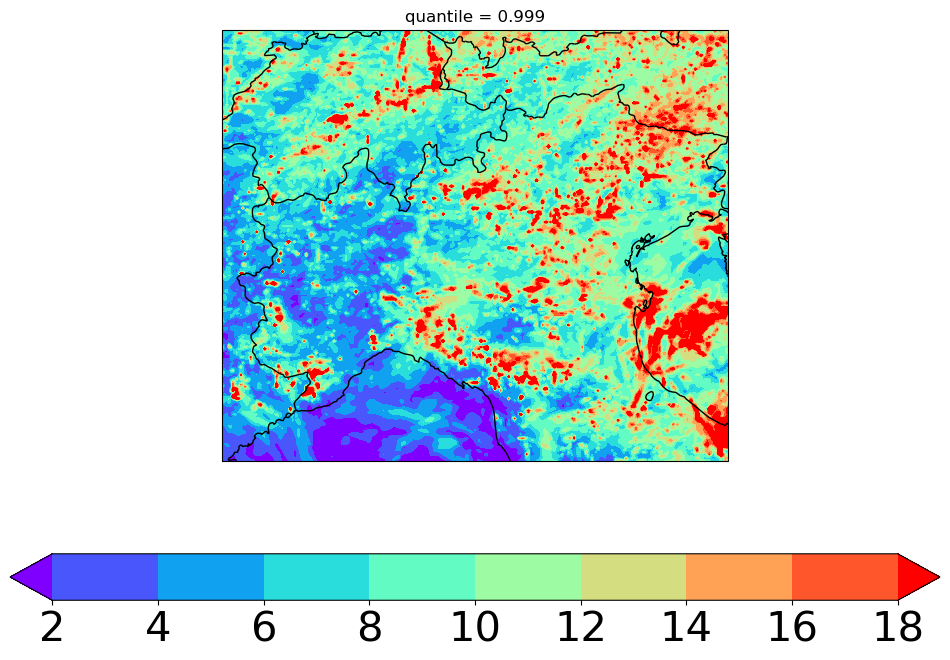

In [43]:
rot=ccrs.RotatedPole(pole_longitude=-170,pole_latitude=43)

fig,ax=plt.subplots(1,1,figsize=(12,8),subplot_kw={"projection":rot})

pcm=q_mohc.plot.contourf(ax=ax,
                           levels=np.arange(2,19,2),
                           cmap='rainbow',
                           #cmap='gist_rainbow',
                           add_colorbar=False,
                           #transform=rot
                           )
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.set_extent([6.5,13.5,43.25,47.6],crs=ccrs.PlateCarree())
cbar=fig.colorbar(pcm, ax=ax, extend='both', orientation='horizontal')
cbar.ax.tick_params(labelsize=30)

In [19]:
cmcc_month=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/cmcc/reanalysis/precipitation_amount/era5-downscaled-over-italy_VHR-REA_IT_1989_2020_hourly_1989*_hourly.nc").load()
cmcc_month

<xarray.Dataset>
Dimensions:    (time: 8760, rlat: 224, rlon: 273, bnds: 2)
Coordinates:
    lat        (rlat, rlon) float32 43.12 43.12 43.12 ... 47.69 47.69 47.69
  * rlon       (rlon) float64 -3.993 -3.973 -3.953 -3.933 ... 1.407 1.427 1.447
  * rlat       (rlat) float64 0.2524 0.2724 0.2924 0.3124 ... 4.672 4.692 4.712
    lon        (rlat, rlon) float32 6.525 6.553 6.58 6.607 ... 14.08 14.11 14.14
  * time       (time) datetime64[ns] 1989-01-01 ... 1989-12-31T23:00:00
Dimensions without coordinates: bnds
Data variables:
    TOT_PREC   (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    crs        (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    time_bnds  (time, bnds) datetime64[ns] 1988-12-31T23:00:00 ... 1989-12-31...
Attributes: (12/13)
    CDI:             Climate Data Interface version 1.9.8 (https://mpimet.mpg...
    Conventions:     CF-1.4
    history:         Generated by CMCC DDS version 0.6.0 2023-02-07 09:57:41....
    source:          COSMO
    institution:     Fondazione CMCC (Euro-Mediterranean Center on Climate Ch...
    title:           VHR-REA CCLM downscaling ERA5 (0.02 Deg)
    ...              ...
    experiment_id:   Evaluation with Urban Parametrization, DT=20sec
    conventionsURL:  http://www.cfconventions.org/
    contact:         Mario Raffa (mario.raffa@cmcc.it)
    references:      http//www.clm-community.eu, http://www.cmcc.it
    creation_date:   2021-03
    CDO:             Climate Data Operators version 1.9.8 (https://mpimet.mpg...

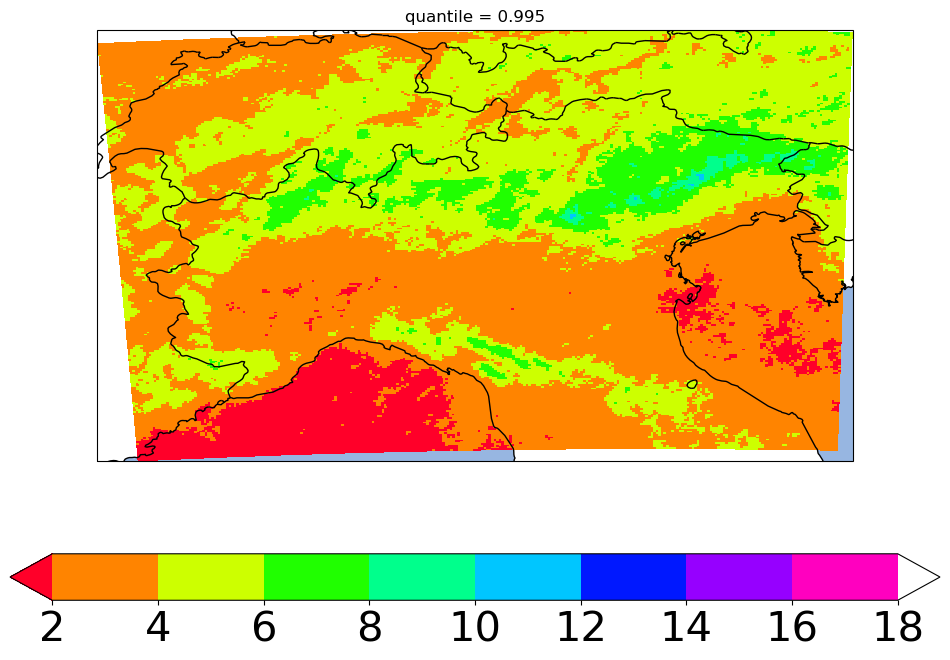

In [22]:
rot=ccrs.RotatedPole(pole_longitude=-168,pole_latitude=47)

fig,ax=plt.subplots(1,1,figsize=(12,8),subplot_kw={"projection":ccrs.PlateCarree()})

pcm=cmcc_month.TOT_PREC.quantile(q=0.995,dim='time').plot.pcolormesh(ax=ax,
                                                        levels=np.arange(2,19,2),
                                                        cmap='gist_rainbow',
                                                        add_colorbar=False,
                                                        transform=rot)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
cbar=fig.colorbar(pcm, ax=ax, extend='both', orientation='horizontal')
cbar.ax.tick_params(labelsize=30)



In [81]:
import xarray as xr
ds=xr.open_dataset("/mnt/data/RESTRICTED/SPHERA/requestData_20150101_zoom.grb2",engine="pynio")
ds

<xarray.Dataset>
Dimensions:                 (initial_time0_hours: 23, ygrid_0: 153, xgrid_0: 120, forecast_time0: 23)
Coordinates:
  * initial_time0_hours     (initial_time0_hours) datetime64[ns] 2015-01-01T0...
  * forecast_time0          (forecast_time0) timedelta64[ns] 01:00:00 ... 23:...
    gridlat_0               (ygrid_0, xgrid_0) float32 ...
    gridlon_0               (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0
Data variables:
    TMP_P0_L103_GRLL0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    UGRD_P0_L103_GRLL0      (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    VGRD_P0_L103_GRLL0      (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    TPRATE_P8_L1_GRLL0_acc  (initial_time0_hours, forecast_time0, ygrid_0, xgrid_0) float32 ...
    initial_time0_encoded   (initial_time0_hours) float64 ...
    gridrot_0               (ygrid_0, xgrid_0) float32 ...
    initial_time0           (initial_time0_hours) |S0 ...

In [82]:
ds.to_netcdf("/mnt/data/lcesarini/tmp/sphera_netcdf.nc")

In [83]:
ds2=xr.open_dataset("/mnt/data/lcesarini/tmp/sphera_netcdf.nc")
ds2

<xarray.Dataset>
Dimensions:                 (initial_time0_hours: 23, ygrid_0: 153, xgrid_0: 120, forecast_time0: 23)
Coordinates:
  * initial_time0_hours     (initial_time0_hours) datetime64[ns] 2015-01-01T0...
  * forecast_time0          (forecast_time0) timedelta64[ns] 01:00:00 ... 23:...
    gridlat_0               (ygrid_0, xgrid_0) float32 ...
    gridlon_0               (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0
Data variables:
    TMP_P0_L103_GRLL0       (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    UGRD_P0_L103_GRLL0      (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    VGRD_P0_L103_GRLL0      (initial_time0_hours, ygrid_0, xgrid_0) float32 ...
    TPRATE_P8_L1_GRLL0_acc  (initial_time0_hours, forecast_time0, ygrid_0, xgrid_0) float32 ...
    initial_time0_encoded   (initial_time0_hours) float64 ...
    gridrot_0               (ygrid_0, xgrid_0) float32 ...
    initial_time0           (initial_time0_hours) |S18 ...

In [89]:
ds['UGRD_P0_L103_GRLL0'].rename({'initial_time0_hours':'time'})

<xarray.DataArray 'UGRD_P0_L103_GRLL0' (time: 23, ygrid_0: 153, xgrid_0: 120)>
[422280 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01T01:00:00 ... 2015-01-01T23:00:00
    gridlat_0  (ygrid_0, xgrid_0) float32 44.5 44.5 44.5 ... 47.49 47.49 47.49
    gridlon_0  (ygrid_0, xgrid_0) float32 10.0 10.03 10.06 ... 13.45 13.48 13.51
Dimensions without coordinates: ygrid_0, xgrid_0
Attributes:
    center:                                         Offenbach (RSMC)
    production_status:                              Operational products
    long_name:                                      U-component of wind
    units:                                          m s-1
    grid_type:                                      Rotated latitude/longitude
    parameter_discipline_and_category:              Meteorological products, ...
    parameter_template_discipline_category_number:  [0 0 2 2]
    level_type:                                     Specified height level ab...
    level:                                          [10.]
    forecast_time:                                  [0]
    forecast_time_units:                            hours

In [31]:

slice=ds.TPRATE_P8_L1_GRLL0_acc.isel(initial_time0_hours=12,forecast_time0=12)
rotated_pole = ccrs.RotatedPole(pole_latitude=47, pole_longitude=-10)

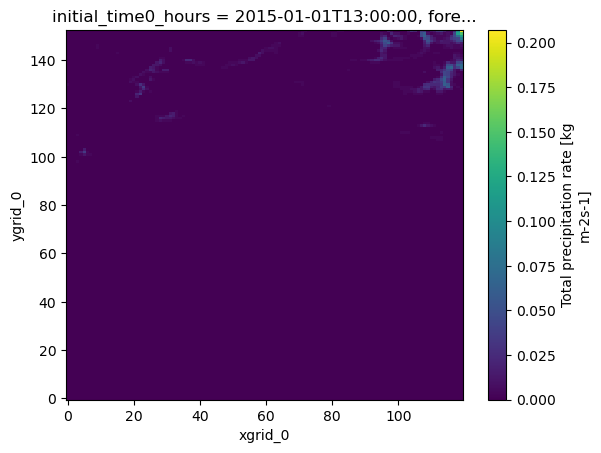

In [35]:
slice.plot()

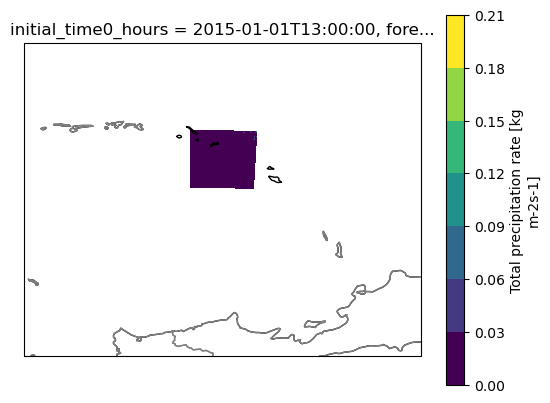

In [75]:
ax=plt.axes(projection=ccrs.RotatedPole(pole_latitude=10, pole_longitude=-170))
#ax=plt.axes(projection=ccrs.PlateCarree())
slice.plot(ax=ax,x="gridlon_0",y="gridlat_0",levels=9)
# slice.plot(ax=ax,x="xgrid_0",y="ygrid_0",levels=9)
ax.coastlines()
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='red')
# shp_triveneto.boundary.plot(ax=ax,edgecolor='red')
ax.set_extent([1.2,22.15,35.6,52.15])

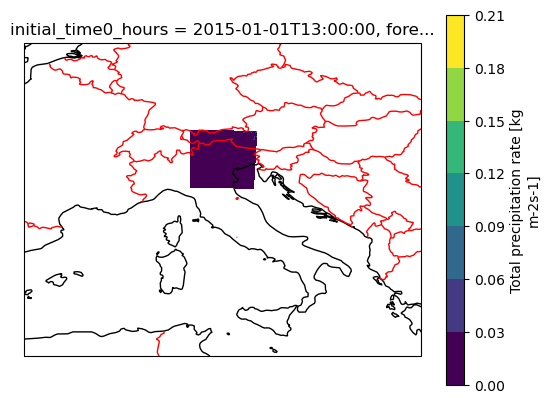

In [76]:
ax=plt.axes(projection=ccrs.PlateCarree())
slice.plot(ax=ax,x="gridlon_0",y="gridlat_0",levels=9)
ax.coastlines()
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='red')
# shp_triveneto.boundary.plot(ax=ax,edgecolor='red')
ax.set_extent([1.2,22.15,35.6,52.15])

/home/lcesarini/miniconda3/envs/colorbar/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


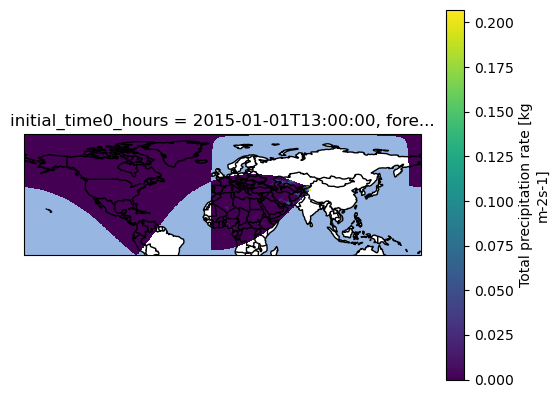

In [43]:
ax=plt.axes(projection=ccrs.PlateCarree())
slice.plot(ax=ax,transform=rotated_pole,x="xgrid_0",y="ygrid_0")
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)


In [ ]:
PATH="mnt/data/lcesarini/ECMWF-ERAINT/HCLIMcom/CPM/mw/"
mw_hclim = xr.open_mfdataset(f"/mnt/data/lcesarini/ECMWF-ERAINT/HCLIMcom/CPM/mw/mw_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_1hr_*.nc")

In [ ]:
import os 
from glob import glob
os.chdir("/mnt/data/RESTRICTED/CARIPARO/cmcc/reanalysis/precipitation_amount")

list_files=glob("*.nc")
list_files

In [ ]:
import subprocess
for name in list_files:
    new_name=name.replace("climate-projections-8km-over-italy-historical","era5-downscaled-over-italy-VHR-REA_IT")
    subprocess.run(f"mv {name} {new_name}",shell=True)


In [ ]:
cmcc=xr.open_mfdataset("era5-downscaled-over-italy-VHR-REA_IT*").load()
cmcc

In [ ]:
q99=cmcc.quantile(q=0.99,dim='time')

In [ ]:
q99.TOT_PREC.plot(x="rlon",y="rlat")

In [ ]:
cmcc_reg=xr.open_dataset("/mnt/data/lcesarini/tmp/test_regridded_cmcc.nc").isel(time=12)

In [ ]:
ax=plt.axes(projection=ccrs.PlateCarree())

cmcc_reg.TOT_PREC.plot.pcolormesh(ax=ax)
shp_triveneto.plot(ax=ax)

In [ ]:
norm1 = mpl.colors.BoundaryNorm(boundaries=np.arange(5,35,5), ncolors=np.arange(5,35,5).shape[0]+1, extend='both')
norm2 = mpl.colors.BoundaryNorm(np.array([0,2,4,6,8,10,12,14,16]), np.array([0,2,4,6,8,10,12,14,16]).shape[0]+1, extend='both')
norm3 = mpl.colors.BoundaryNorm(np.array([0,2,4,6,8,10,12,14,16]), np.array([0,2,4,6,8,10,12,14,16]).shape[0]+1, extend='both')
norm3

In [ ]:
rot = ccrs.LambertConformal(central_longitude=16, central_latitude=45.5, 
                                false_easting=1349205.5349238443, false_northing=732542.657192843)
                                
fig,ax = plt.subplots(nrows=1,
                      ncols=3,#int(len(list_to_plot) / 2),
                      figsize=(18,18),constrained_layout=True, squeeze=True,
                      subplot_kw={"projection":ccrs.PlateCarree()}
                      )

ax=ax.flatten()

max.plot.pcolormesh(transform=rot,ax=ax[0],
                    cmap=cmap,
                    vmin=5,vmax=35,
                    cbar_kwargs={"shrink":0.7,
                    "orientation":"horizontal",
                    "label":f"Max wind [m/s]"}
)
shp_triveneto.boundary.plot(ax=ax[0], edgecolor="red")
freq.isel(quantile=0).plot.pcolormesh(transform=rot,ax=ax[1],
                    cmap=cmap,
                    vmin=3.6,vmax=5,
                    cbar_kwargs={"shrink":0.7,
                                "orientation":"horizontal",
                                "label":f"Freq > 95th [%]"}
)
shp_triveneto.boundary.plot(ax=ax[1], edgecolor="red")
mw_99.isel(quantile=4).plot.pcolormesh(transform=rot,ax=ax[2],
                                       cmap=cmap,
                                       vmin=0,vmax=16,
                                       cbar_kwargs={"shrink":0.7,
                                                    "orientation":"horizontal",
                                                    "label":f"99th [m/s]"}
)
shp_triveneto.boundary.plot(ax=ax[2], edgecolor="red")

ax[0].set_title("Max Wind")
ax[1].set_title("Frequency")
ax[2].set_title("99th")


In [ ]:
rot = ccrs.LambertConformal(central_longitude=16, central_latitude=45.5, 
                                false_easting=1349205.5349238443, false_northing=732542.657192843)
                                
fig,ax = plt.subplots(nrows=1,
                      ncols=3,#int(len(list_to_plot) / 2),
                      figsize=(18,18),constrained_layout=True, squeeze=True,
                      subplot_kw={"projection":ccrs.PlateCarree()}
                      )

ax=ax.flatten()

max.plot.pcolormesh(transform=rot,ax=ax[0],
                    cmap="Greens",
                    cbar_kwargs={"shrink":0.7,
                    "orientation":"horizontal",
                    "label":f"Max wind [m/s]"}
)
shp_triveneto.boundary.plot(ax=ax[0], edgecolor="red")
freq.plot.pcolormesh(transform=rot,ax=ax[1],
                    cmap="Greens",

                    cbar_kwargs={"shrink":0.7,
                                "orientation":"horizontal",
                                "label":f"Freq > 95th [%]"}
)
shp_triveneto.boundary.plot(ax=ax[1], edgecolor="red")
mw_99.isel(quantile=1).plot.pcolormesh(transform=rot,ax=ax[2],
                                       cmap="Greens",
                                       
                                       cbar_kwargs={"shrink":0.7,
                                                    "orientation":"horizontal",
                                                    "label":f"99th [m/s]"}
)
shp_triveneto.boundary.plot(ax=ax[2], edgecolor="red")

ax[0].set_title("Max Wind")
ax[1].set_title("Frequency")
ax[2].set_title("99th")


# Check regridding

In [ ]:
import xarray as xr 

ds=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/common/ECMWF-ERAINT/HCLIMcom/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_1hr_200001010030-200012312330_regrid.nc")

ds.sel(time="2000-08-31").isel(time=16)

In [ ]:
qs=(ds.sel(time="2000-08-31").isel(time=16).pr.quantile(q=[0.5,0.7,0.85,0.95,0.99,0.99999]) * 3600).values
qs

In [ ]:
bounds = np.linspace(0.1,21,20)#np.array([18,19,20,21,22,23,24])

norm = mpl.colors.BoundaryNorm(bounds.round(2), bounds.shape[0]+1, extend='both')

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(9,9),constrained_layout=True, squeeze=True,
                      subplot_kw={"projection":ccrs.PlateCarree()}
                      )
(ds.sel(time="2000-08-31").isel(time=16).pr * 3600).\
    plot.contourf(ax=ax,
                    cmap=plt.cm.rainbow,norm=norm,
                    cbar_kwargs={"shrink":0.7,
                                 "orientation":"horizontal"})
shp_triveneto.boundary.plot(ax=ax, edgecolor="red")
gl = ax.gridlines(
    draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--',xlocs=[11],ylocs=[45,47]
)
ax.set_title(f"Conservative")

ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.coastlines()
# ax.set_extent([10.38,13.1,44.7,47.1])


In [ ]:
bounds = np.linspace(0.1,21,20)#np.array([18,19,20,21,22,23,24])

norm = mpl.colors.BoundaryNorm(bounds.round(2), bounds.shape[0]+1, extend='both')

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(9,9),constrained_layout=True, squeeze=True,
                      subplot_kw={"projection":ccrs.PlateCarree()}
                      )
ax=ax.flatten()

for i,ds in enumerate([x1,x2,x3,x4]):
    (ds.pr).\
        plot.contourf(ax=ax[i],x="lon",y="lat",
                        cmap=plt.cm.rainbow,norm=norm,
                        cbar_kwargs={"shrink":0.7,
                                    "orientation":"horizontal"})
    shp_triveneto.boundary.plot(ax=ax[i], edgecolor="red")
    gl = ax[i].gridlines(
        draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--',#xlocs=[11],ylocs=[45,47]
    )
    ax[i].coastlines()


In [ ]:
eth_orig=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/ETH/CPM/uas/uas_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_COSMO-pompa_5.0_2019.1_1hr_200001010030_200012312330.nc")


In [ ]:
eth_orig

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(9,9),constrained_layout=True, squeeze=True,
                      subplot_kw={"projection":ccrs.PlateCarree()}
                      )

eth_orig.isel(time=13).uas.plot.pcolormesh(x="lon",y="lat",ax=ax,cbar_kwargs={"shrink":0.25})
gl = ax.gridlines(
    draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--',#xlocs=[11],ylocs=[45,47]
)
ax.coastlines()
ax.set_extent([6,14,43,47.5])

In [ ]:
eth_regrid=xr.open_dataset("/mnt/data/lcesarini/nco_eth_regrid.nc")



In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(9,9),constrained_layout=True, squeeze=True,
                      subplot_kw={"projection":ccrs.PlateCarree()}
                      )

eth_regrid.isel(time=13).uas.plot.pcolormesh(ax=ax,cbar_kwargs={"shrink":0.25})
gl = ax.gridlines(
    draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--',#xlocs=[11],ylocs=[45,47]
)
ax.coastlines()
ax.set_extent([6,14,43,47.5])

## Check MOHC data

- Dati sono mensili

In [ ]:
mohc=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/MOHC/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HadREM3-RA-UM10.1_fpsconv-x0n1-v1_1hr_200912010030-200912312330.nc")
mohc

In [ ]:
# REad remapped data
mohc_regrid=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/common/ECMWF-ERAINT/MOHC/CPM/pr/MOHC_ECMWF-ERAINT_20*.nc").load()
mohc_regrid

In [ ]:
ds_autumn=mohc_regrid.isel(time=mohc_regrid['time.season'].isin("SON"))
ds_winter=mohc_regrid.isel(time=mohc_regrid['time.season'].isin("DJF"))
ds_spring=mohc_regrid.isel(time=mohc_regrid['time.season'].isin("MAM"))
ds_summer=mohc_regrid.isel(time=mohc_regrid['time.season'].isin("JJA"))

In [ ]:
heavy_prec_autumn=ds_autumn.pr.quantile(q=0.999, dim='time')
heavy_prec_winter=ds_winter.pr.quantile(q=0.999, dim='time')
heavy_prec_spring=ds_spring.pr.quantile(q=0.999, dim='time')
heavy_prec_summer=ds_summer.pr.quantile(q=0.999, dim='time')


In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15),constrained_layout=True, squeeze=True,
                      subplot_kw={"projection":ccrs.PlateCarree()}
                      )
seas=["SON","DJF","MAM","JJA"]
ax=ax.flatten()
for i,ds in enumerate([heavy_prec_autumn,heavy_prec_winter,heavy_prec_spring,heavy_prec_summer]):
    ds.plot.pcolormesh(ax=ax[i],cbar_kwargs={"shrink":0.25}, 
                            cmap=plt.cm.rainbow,
                            vmin = 1,
                            vmax = 15,
                            extend='both')
    gl = ax[i].gridlines(
        draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--',#xlocs=[11],ylocs=[45,47]
    )
    ax[i].coastlines()
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].set_title(seas[i])
    ax[i].set_extent([10.3,13.1,44.7,47.1])
    shp_triveneto.boundary.plot(ax=ax[i], edgecolor="green")


# GRIDDING STATION DATA

In [2]:
os.chdir("/home/lcesarini/2022_resilience/")
stations_path = glob("stations/text/*.csv")
dates_path    = glob("data/dates/*.csv")
len(dates_path)==len(stations_path)

True

In [3]:
import pandas as pd

In [4]:
df=[]
for path_d,path_s in tqdm(zip(dates_path,stations_path)):
    date,prec=pd.read_csv(path_d,parse_dates=[0],date_parser=pd.to_datetime),pd.read_csv(path_s)

    df.append(pd.concat([date,prec],axis=1))
    
    

174it [02:45,  1.05it/s]


## CREATE DF HOSTING THE WHOLE DATASET

- row dimension = number of stations  
- column dimensions = code_station + hours from 01/01/1981 to 31/12/2020 + geometry

In [ ]:
(df[0].dtypes)

In [ ]:
df[0]['date'][0]

In [ ]:
range_dates=pd.date_range(start="1981-01-01 00:00:00",end="2020-12-31 22:00:00",freq="H")
len(range_dates) == len(df[0]['date'])

In [ ]:
!pwd

In [ ]:
meta_stations=pd.read_csv("meta_station_updated_col.csv",index_col=0)
meta_stations

In [ ]:
df_init=pd.DataFrame(data=range_dates,columns=['date'])
print(df_init.head())
df_init.dtypes

In [ ]:
match_column=np.where(df_init.columns==df[0].columns[1])[0]

In [ ]:
for _ in df:
    df_init=pd.merge(df_init,_,how='left',on='date') 

df_init.head()    

In [ ]:
q99=df_init.iloc[:,1:].apply(np.nanquantile,axis=0,q=[0.999])

In [ ]:
q999=q99.transpose()
q999=q999.reset_index()

q999.columns=['name','q999']

In [ ]:
df_init_t=df_init.transpose()
df_init_t

In [ ]:
df_init_t=df_init_t.reset_index()
df_init_t

In [ ]:
df_init_t.columns=["name"] + [colnames for colnames in df_init_t.iloc[0,1:]] 
df_init_t.head()


In [ ]:
df_init_t=df_init_t.drop(df_init_t.index[0],axis=0)


In [ ]:
merged_df=pd.merge(df_init_t,meta_stations,on='name')

In [ ]:
merged_df

In [ ]:
gdf=gpd.GeoDataFrame(data=merged_df,geometry=gpd.points_from_xy(merged_df.lon, merged_df.lat), crs=4326)
gdf

In [ ]:
merged_q999=pd.merge(q999,meta_stations,on='name')

In [ ]:
gdf_999=gpd.GeoDataFrame(data=merged_q999,geometry=gpd.points_from_xy(merged_q999.lon, merged_q999.lat), crs=4326)
gdf_999

In [23]:
30*24


720

In [ ]:
import json
from functools import partial

import geopandas as gpd
from shapely.geometry import box, mapping

from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial

%matplotlib inline

In [ ]:
list_meas=[time for time in gdf.columns[1:350640]]

In [ ]:
gdf.columns=["name"]+[col.to_datetime64() for col in gdf.columns[1:350640]]+[col for col in gdf.columns[350640:]]

In [ ]:
[type(col) for col in gdf.columns[1:5]]

In [ ]:
import geocube

geo_grid = make_geocube(
    vector_data=gdf,
    measurements=[gdf.columns[1]],
    datetime_measurements=[gdf.columns[1]],
    geom=json.dumps(mapping(box(6.5, 43.25,13.975776,  47.555246))),
    output_crs="epsg:4326",
    resolution=(0.03337400000000024, 0.03337400000000024),
    rasterize_function=rasterize_points_griddata
)

In [ ]:
import geocube

geo_grid = make_geocube(
    vector_data=gdf_999,
    measurements=['q999'],
    geom=json.dumps(mapping(box(6.5, 43.25,13.975776,  47.555246))),
    output_crs="epsg:4326",
    resolution=(0.03337400000000024, 0.03337400000000024),
    rasterize_function=rasterize_points_griddata
)

In [ ]:
px_lon_st=geo_grid.q999.sel(x=[lon for lon in gdf_999.lon],y=[lat for lat in gdf_999.lat], method='nearest').x.values  
px_lat_st=geo_grid.q999.sel(x=[lon for lon in gdf_999.lon],y=[lat for lat in gdf_999.lat], method='nearest').y.values 
px_lon_st.shape==px_lat_st.shape

In [ ]:
list_coords=[]
for lon in tqdm(geo_grid.x,total=225):
    for lat in tqdm(geo_grid.y,total=130):
        list_coords.append((lon,lat) in list_coords_st)
len(list_coords)

In [ ]:
np.array(list_coords)

In [ ]:
mask=xr.DataArray(np.array(list_coords).reshape(130,225,order='F'),dims={'y':geo_grid.y,'x':geo_grid.x},attrs=geo_grid.attrs).plot()

In [ ]:
list_coords_st=[(lon,lat) for lon,lat in zip(px_lon_st,px_lat_st)]

len(list_coords_st)


In [ ]:
mask_st=np.array(list_coords).reshape(130,225,order="F").astype(np.int16)

In [ ]:
(geo_grid * mask_st)[list(geo_grid.data_vars)[0]]


In [ ]:

fig,ax=plt.subplots(1,1,figsize=(24,16),subplot_kw={"projection":ccrs.PlateCarree()})
((geo_grid * mask_st)[list(geo_grid.data_vars)[0]]).plot.pcolormesh(ax=ax,
                   cbar_kwargs={"shrink":0.5},
                   extend="both",
                   cmap=cmap,
                   vmin=1,vmax=15,
                   add_colorbar=True,alpha=1)
#gdf_999.plot(column='q999',ax=ax,markersize=4, cmap="rainbow", legend=False)
shp_triveneto.boundary.plot(ax=ax, edgecolor="red")

ax.add_feature(cfeature.RIVERS)
# ax.add_feature(cfeature.BORDERS)
ax.coastlines()
ax.set_title(f"for fuck sake")
# ax.set_extent([10.50,10.55,46.75,46.80])
ax.set_extent([10.4,13.1,44.5,47.1])

In [ ]:

fig,ax=plt.subplots(1,1,figsize=(12,8),subplot_kw={"projection":ccrs.PlateCarree()})
geo_grid.q999.plot(ax=ax,
                   #cbar_kwargs={"shrink":0.5},
                   extend="max",
                   cmap=plt.cm.rainbow,
                   add_colorbar=False,alpha=0.5)
gdf_999.plot(column='q999',ax=ax,markersize=48, cmap="rainbow", legend=True)
shp_triveneto.boundary.plot(ax=ax, edgecolor="red")

ax.add_feature(cfeature.RIVERS)
# ax.add_feature(cfeature.BORDERS)
ax.coastlines()
ax.set_title(f"for fuck sake")
ax.set_extent([10.4,13.1,44.5,47.1])

In [ ]:
mohc_regrid=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/common/ECMWF-ERAINT/MOHC/CPM/pr/MOHC_ECMWF-ERAINT_201010010030-201010312330.nc").isel(time=10).load()
mohc_regrid

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,12),subplot_kw={"projection":ccrs.PlateCarree()})
gdf_999.plot(column='q999',ax=ax,markersize=48, cmap="rainbow", legend=True)
shp_triveneto.boundary.plot(ax=ax, edgecolor="red")
mohc_regrid.pr.plot(ax=ax,add_colorbar=False,alpha=0.51)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.set_extent([10.4,13.1,44.5,47.1])

In [17]:
empty_common=xr.load_dataset("../data/empty_common_grid.nc")
empty_common

<xarray.Dataset>
Dimensions:      (lon: 218, lat: 88, time: 1)
Coordinates:
  * lon          (lon) float64 6.7 6.733 6.767 6.8 ... 13.84 13.88 13.91 13.94
  * lat          (lat) float64 44.25 44.28 44.32 44.35 ... 47.09 47.12 47.15
    spatial_ref  int64 0
Dimensions without coordinates: time
Data variables:
    variable     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,8),subplot_kw={"projection":ccrs.PlateCarree()})
empty_common.where((empty_common.lon > 10.38) & (empty_common.lat > 44.7), drop=True).\
    variable.plot(ax=ax,cbar_kwargs={"shrink":0.5},extend="max")

shp_triveneto.boundary.plot(ax=ax, edgecolor="red")

ax.add_feature(cfeature.RIVERS)
# ax.add_feature(cfeature.BORDERS)
ax.coastlines()
ax.set_title(f"for fuck sake")

In [ ]:
empty_common.where(empty_common.lon > 10.38)

## Interpolate with scipy

In [5]:
mohc_regrid=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/MOHC/CPM/pr/MOHC_ECMWF-ERAINT_201010010030-201010312330.nc").isel(time=10).load()
mohc_regrid

<xarray.Dataset>
Dimensions:    (bnds: 2, lon: 272, lat: 158)
Coordinates:
    time       datetime64[ns] 2010-10-01T10:30:00
  * lon        (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * lat        (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (bnds) datetime64[ns] 2010-10-01T10:00:00 2010-10-01T11:00:00
    pr         (lat, lon) float32 0.0 0.0 0.0 ... 1.293e-08 7.266e-08 1.143e-06
Attributes: (12/24)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Fri Feb 03 18:26:31 2023: cdo remapycon,n...
    institution:                    MetOffice, Hadley Centre, UK
    Conventions:                    CF-1.5
    CORDEX_domain:                  REU-2
    contact:                        segolene.berthou@metoffice.gov.uk
    ...                             ...
    product:                        output
    project_id:                     CORDEX-FPSCONV
    rcm_version_id:                 fpsconv-x0n1-v1
    references:                     Berthou et al. (2018). Pan-European clima...
    tracking_id:                    hdl:21.14100/1a0af901-714e-47b5-8d37-4f53...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [3]:
import os
import pandas as pd
os.chdir("/home/lcesarini/2022_resilience/")
df=pd.read_parquet("data/df_st_yr/stations_1995.parquet")
# meta_stations=pd.read_csv("meta_station_updated_col.csv",index_col=0)
# merged_df=pd.merge(df,meta_stations.loc[:,['name','lon','lat']],on='name')
# gdf=gpd.GeoDataFrame(data=merged_df,geometry=gpd.points_from_xy(merged_df.lon, merged_df.lat), crs=4326)
# gdf
df

name  t_0  t_1  t_2  t_3  t_4  t_5  t_6  t_7  t_8  ...  t_8750  \
1    AA_0220  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
2    AA_0310  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     NaN   
3    AA_0970  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
4    AA_2320  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
5    AA_3140  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
..       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
170  VE_0246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.2   
171  VE_0247  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     NaN   
172  VE_0248  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     NaN   
173  VE_0251  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     NaN   
174  VE_0252  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   

     t_8751  t_8752  t_8753  t_8754  t_8755  t_8756  t_8757  t_8758  t_8759  
1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3       0.4     1.2     2.0     1.6     3.2     1.0     0.2     0.0     0.0  
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     NaN  
5       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
..      ...     ...     ...     ...     ...     ...     ...     ...     ...  
170     0.0     0.4     0.6     0.2     0.4     0.2     0.6     0.4     0.0  
171     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
172     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
173     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
174     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     NaN  

[174 rows x 8761 columns]

In [7]:
from scipy.interpolate import griddata
#empty_common=xr.load_dataset("data/empty_common_grid.nc")

points = np.array([gdf.lon,gdf.lat]).T

nx,ny = np.meshgrid(mohc_regrid.lon.values,mohc_regrid.lat.values)
mesh_1 =np.concatenate([nx.reshape(-1,1),ny.reshape(-1,1)], axis = 1)

values = np.array(gdf.loc[:,"t_0":"t_8759"],dtype=np.float32)
grid_z0 = griddata(points, values, mesh_1, method='nearest')

grid_z0.shape

(42976, 8760)

In [8]:
from datetime import datetime,timedelta

delta_t=np.arange(np.datetime64('1995-01-01T00:00:00.000000000'),
                  np.datetime64('1996-01-01T00:00:00.000000000'),
                  timedelta(hours=1))

In [9]:
xr_year=xr.DataArray(grid_z0.reshape(158,272,8760),
                        coords={
                              'lat':mohc_regrid.lat,
                              'lon':mohc_regrid.lon,
                              'time':delta_t,
                              },
                        dims={
                              "lat":mohc_regrid.lat.shape[0],
                              "lon":mohc_regrid.lon.shape[0],
                              "time":delta_t.shape[0],
                        }
                              )
ds_year=xr_year.to_dataset(name='pr')
ds_year.rio.write_crs("epsg:4326", inplace=True)
ds_year

<xarray.Dataset>
Dimensions:      (lat: 158, lon: 272, time: 8760)
Coordinates:
  * lat          (lat) float64 43.25 43.28 43.3 43.33 ... 47.51 47.54 47.57
  * lon          (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * time         (time) datetime64[ns] 1995-01-01 ... 1995-12-31T23:00:00
    spatial_ref  int64 0
Data variables:
    pr           (lat, lon, time) float32 0.8 0.2 0.0 0.0 ... 0.0 0.0 0.0 0.0

## CREATE MASK FOR STATIONS

In [10]:
px_lon_st=mohc_regrid.pr.sel(lon=[lon for lon in gdf.lon],
                                    lat=[lat for lat in gdf.lat], method='nearest').\
                                        lon.values  
px_lat_st=mohc_regrid.pr.sel(lon=[lon for lon in gdf.lon],
                                    lat=[lat for lat in gdf.lat], method='nearest').\
                                        lat.values 
px_lon_st.shape==px_lat_st.shape

list_coords_st=[(lon,lat) for lon,lat in zip(px_lon_st,px_lat_st)]

In [33]:
nx,ny=np.meshgrid(mohc_regrid.lon,mohc_regrid.lat)
mesh_grid=np.concatenate([nx.reshape(-1,1),ny.reshape(-1,1)], axis = 1)
nx2,ny2=np.meshgrid(px_lon_st,px_lat_st)
mesh_st=np.concatenate([nx2.reshape(-1,1),ny2.reshape(-1,1)], axis = 1)
print(mesh_grid.shape, .shape)


(42976, 2) (30276, 2)


In [37]:
np.all([cpl in mesh_grid for cpl in mesh_st])

True

In [32]:
np.all([lat in mohc_regrid.lat for lat in px_lat_st])

True

In [11]:
list_coords=[]
for lon in tqdm(mohc_regrid.lon,total=272):
    for lat in mohc_regrid.lat:
        list_coords.append((lon,lat) in list_coords_st)
len(list_coords)

100%|██████████| 272/272 [28:27<00:00,  6.28s/it]


42976

In [12]:
np_mask=np.array(list_coords).reshape(158,272,order='F').astype(np.int16)
np_mask_nan=np.where(np_mask < 1, np.nan,np_mask)

In [13]:

mask_st=xr.DataArray(np_mask_nan,
                     coords={
                           'lat':mohc_regrid.lat,
                           'lon':mohc_regrid.lon,
                        #    'spatial_ref':mohc_regrid.spatial_ref
                           },
                     dims={
                           "lat":mohc_regrid.lat.shape[0],
                           "lon":mohc_regrid.lon.shape[0],
                     })


mask_st=mask_st.to_dataset(name="mask")

In [14]:
mask_st.to_netcdf("data/mask_stations_nan_common.nc")

In [38]:
mask_st

<xarray.Dataset>
Dimensions:  (lat: 158, lon: 272)
Coordinates:
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
Data variables:
    mask     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [15]:
q99=ds_year.quantile(q=[0.99], dim='time')
q99

<xarray.Dataset>
Dimensions:   (lat: 158, lon: 272, quantile: 1)
Coordinates:
  * lat       (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
  * lon       (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * quantile  (quantile) float64 0.99
Data variables:
    pr        (quantile, lat, lon) float64 2.2 2.2 2.2 2.2 ... 2.6 2.6 2.6 2.6

<GeoAxesSubplot: xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

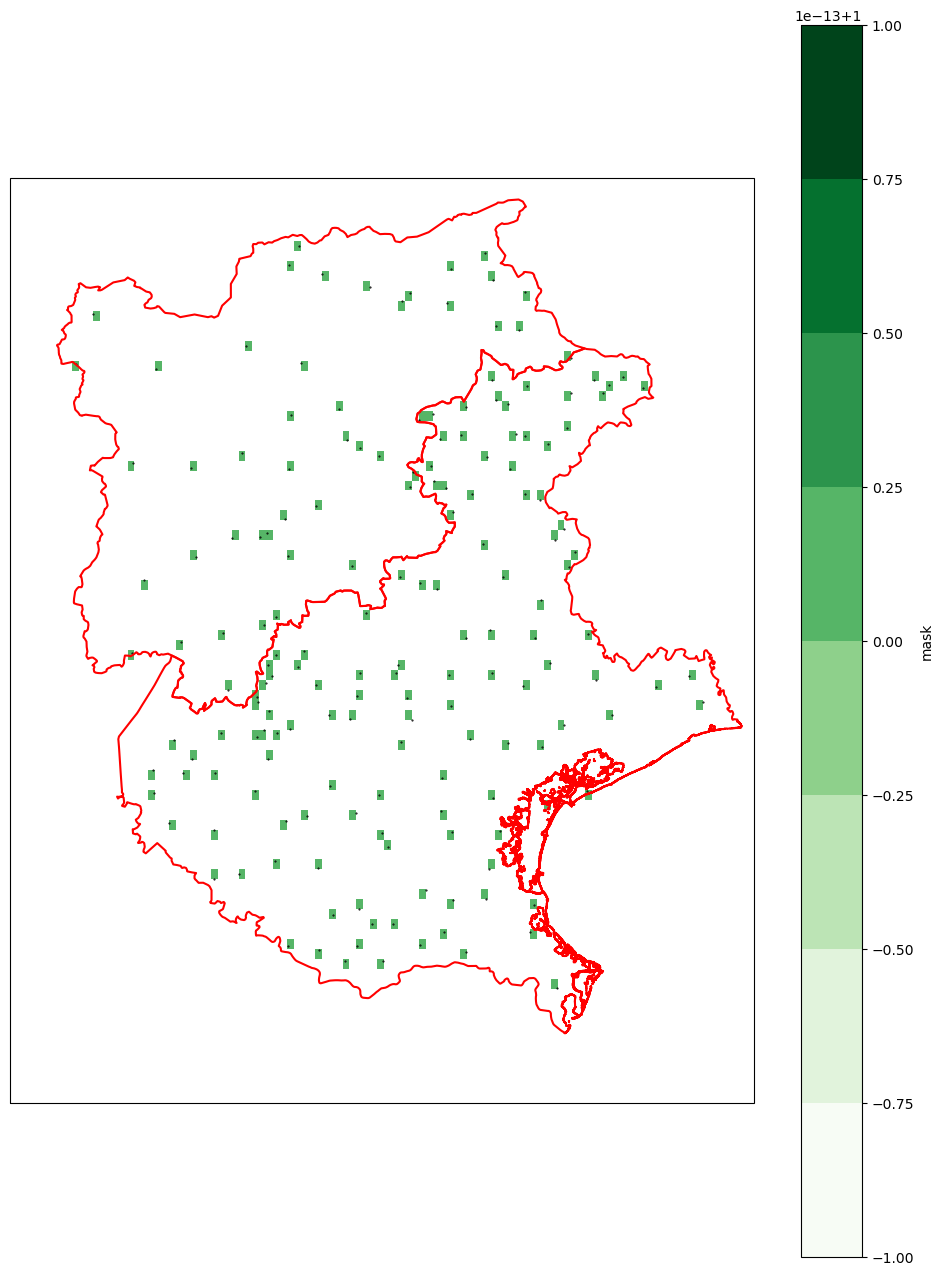

In [39]:
cmap=plt.cm.Greens
fig,ax = plt.subplots(1,subplot_kw={"projection":ccrs.PlateCarree()},
                    figsize=(12,16))
mask_st.mask.plot.pcolormesh(ax=ax,cmap=cmap,levels=9)
#mask_st.mask.plot.pcolormesh(ax=ax,color='black',add_colorbar=False)
shp_triveneto.boundary.plot(ax=ax, edgecolor="red")
ax.set_extent([10.2,13.15,44.6,47.15])
gdf.plot(ax=ax,color='black', markersize=0.25)


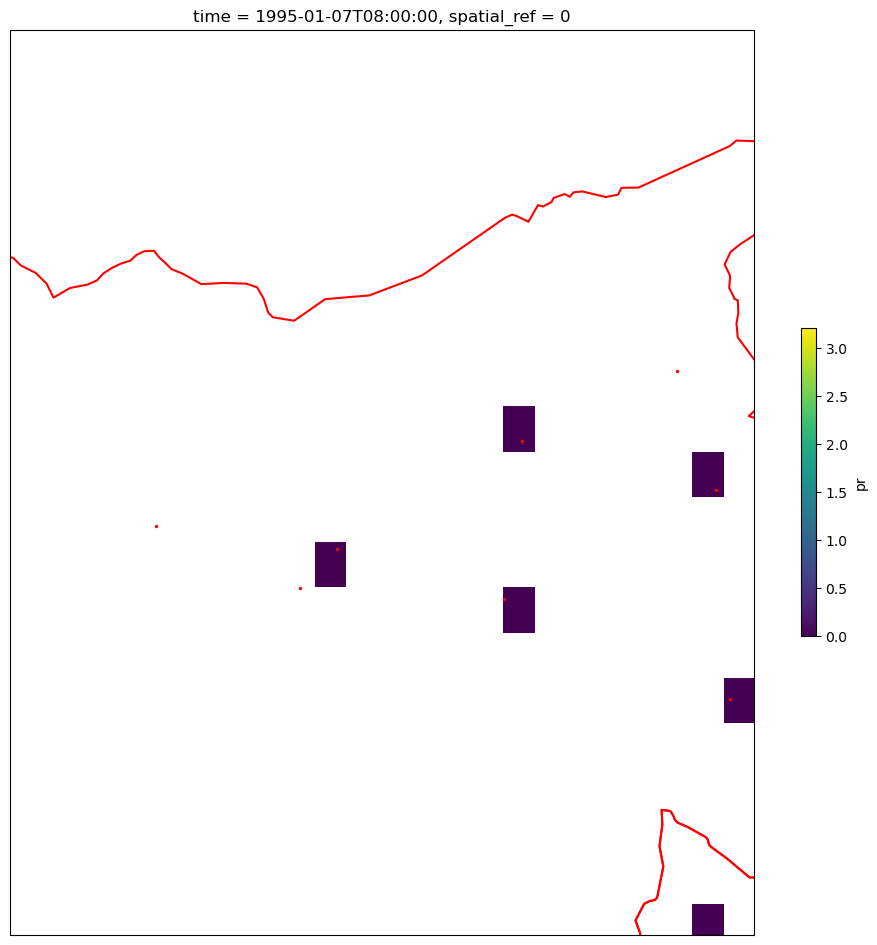

In [21]:
fig,ax = plt.subplots(1,subplot_kw={"projection":ccrs.PlateCarree()},
                    figsize=(12,16))

(ds_year * mask_st.mask).pr.isel(time=152).plot.pcolormesh(cbar_kwargs={"shrink":0.25},)
shp_triveneto.boundary.plot(ax=ax, edgecolor="red")
gdf.plot(ax=ax,color='red',markersize=2)

ax.set_extent([11.5,12.15,46.6,47.15])
# ax.set_extent([10.2,13.15,44.6,47.15])


In [ ]:
def crop_to_extent(xr,xmin=10.38,xmax=13.1,ymin=44.7,ymax=47.1):
    """
    Functions that select inside a given extent

    Parameters
    ----------
    xr : xarrayDataset, 
        xarray dataset to crop
    
    xmin,xmax,ymin,ymax: coordinates of the extent desired.    
    
    Returns
    -------
    
    cropped_ds: xarray dataset croppped

    Examples
    --------
    """
    xr_crop=xr.where((xr.lon > xmin) & (xr.lon < xmax) &\
                     (xr.lat > ymin) & (xr.lat < ymax), 
                     drop=True)

    return xr_crop


In [ ]:
year=1995
crop_to_extent(ds_year * mask_st.mask).to_netcdf(f"data/nc_st_yr/pr_st_{year}.nc")



In [ ]:
for directory in os.listdir("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/"):
    print(directory,":", os.listdir(f"/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/{directory}/CPM/"))

In [ ]:
os.chdir("/mnt/data/RESTRICTED/CARIPARO/common/ECMWF-ERAINT/")

In [ ]:
!ls HCLIMcom/CPM/pr    

In [ ]:
!ls /mnt/data/RESTRICTED/CARIPARO/common/ECMWF-ERAINT/ETH/CPM/pr

In [ ]:
os.chdir("/mnt/data/RESTRICTED/CARIPARO/common/ECMWF-ERAINT/")
eth   = xr.open_mfdataset("ETH/CPM/pr/ETH_ECMWF-ERAINT_*.nc").load()

In [ ]:
mohc  = xr.open_mfdataset("MOHC/CPM/pr/MOHC_ECMWF-ERAINT_2000*.nc").load()

In [ ]:
mohc

In [ ]:
hclim = xr.open_mfdataset("HCLIMcom/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_1hr_*_regrid.nc").load() 

In [ ]:
ictp  = xr.open_mfdataset("ICTP/CPM/pr/ICTP_ECMWF-ERAINT_*.nc").load()

In [ ]:
cnrm  = xr.open_mfdataset("CNRM/CPM/pr/CNRM_ECMWF-ERAINT_*.nc").load()

In [ ]:
def compute_quantile(ds):
    return ds.pr.quantile(q=0.999,dim='time')

list_q = [compute_quantile(model) for model in [mohc,hclim,eth,ictp,cnrm]]



In [ ]:
ens_mean = (list_q[0] + list_q[1] * 3600 + list_q[2] + list_q[3] + list_q[4] ) / 5

In [ ]:
cmap = plt.cm.rainbow

bounds = np.linspace(1,10,6)
norm = mpl.colors.BoundaryNorm(bounds.round(2), bounds.shape[0]+1, extend='max')


In [ ]:
list_q.append(ens_mean)

In [ ]:
fig,ax=plt.subplots(2,3,
                    figsize=(18,16),constrained_layout=True, squeeze=True,
                    subplot_kw={"projection":ccrs.PlateCarree()})
ax=ax.flatten()
titles=["MOHC","HCLIM","ETH","ICTP","CNRM","ENSEMBLE"]
cmap = plt.cm.rainbow
plt.rcParams['axes.titley'] = 1.05
for i,model in enumerate(list_q):
    if i==1:
        (model * 3600).plot.\
            pcolormesh(ax=ax[i],
                        add_colorbar=False,
                        #cbar_kwargs={"shrink":0.75,"orientation":"horizontal"},
                        cmap=cmap,
                        vmin=5,vmax=18
                        #norm=norm
                        )
    else:
        model.plot.\
            pcolormesh(ax=ax[i],
                       add_colorbar=True if i in [2] else False,
                       cbar_kwargs={"shrink":0.75,"orientation":"vertical"} if i in [2] else None,
                       cmap=cmap,
                       vmin=5,vmax=18
                       #norm=norm
                        )
    # shp_triveneto.boundary.plot(ax=ax[i],edgecolor='red')
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].coastlines()
    # ax[i].set_extent([10.2,13.15,44.6,47.15])
    ax[i].set_title(titles[i])



In [ ]:
ele=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/datiDallan/CPM_ETH_Italy_2000-2009_pr_hour.nc")

In [ ]:
ij=pd.read_table("/home/lcesarini/2022_resilience/griglia_ele.txt",header=None)
ij.columns=["name","i","j"]
ij.i=ij.i-1
ij.j=ij.j-1
ij

In [ ]:
mask_regular=xr.open_dataset("/home/lcesarini/2022_resilience/data/mask_stations_nan_common.nc")

In [ ]:
meta_stations=pd.read_csv("/home/lcesarini/2022_resilience/meta_station_updated_col.csv",index_col=0)

gdf=gpd.GeoDataFrame(data=meta_stations,geometry=gpd.points_from_xy(meta_stations.lon, meta_stations.lat), crs=4326)

In [ ]:
eth_regrid=eth

In [ ]:
ele.rotated_pole

In [ ]:
rot=ccrs.RotatedPole(pole_latitude=43,pole_longitude=-170)

In [ ]:
mask_regular.mask

In [ ]:
fig,ax=plt.subplots(1,2,subplot_kw={"projection":ccrs.PlateCarree()},figsize=(16,12))
ax=ax.flatten()
# ele.isel(time=2222).pr.plot(ax=ax[0],cmap='viridis',transform=rot,cbar_kwargs={"shrink":0.5})
mask_regular.mask.plot(ax=ax[1],cmap='viridis',cbar_kwargs={"shrink":0.5})
mask_st.mask.plot(ax=ax[0],cmap='viridis',cbar_kwargs={"shrink":0.5},transform=rot)
gdf.plot(ax=ax[0],color='red', markersize=0.5)
gdf.plot(ax=ax[1],color='red', markersize=0.5)
shp_triveneto.boundary.plot(ax=ax[0])
shp_triveneto.boundary.plot(ax=ax[1])
ax[0].add_feature(cfeature.BORDERS)
ax[1].add_feature(cfeature.BORDERS)
ax[0].coastlines()
ax[1].coastlines()
ax[0].set_extent([10.3,13.2,44.7,47.2])
ax[1].set_extent([10.3,13.2,44.7,47.2])

In [ ]:
eth_regrid.sel(lon=10.525688,lat=46.778793,method='nearest').isel(time=np.isin(eth_regrid.time.dt.year,[2000,2001,2002])).pr.plot()
ele.isel(rlon=ij.i[0],rlat=ij.j[0],time=np.isin(ele.time.dt.year,[2000,2001,2002])).pr.plot(color="red")

In [ ]:
ele.isel(rlon=ij.i[0],rlat=ij.j[0]).pr.lon.item()
plt.rcParams['axes.facecolor'] = 'white'

In [ ]:
A

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score
for idx in tqdm(np.arange(0,ij.shape[0])):
    B=ele.isel(rlon=ij.i[idx],rlat=ij.j[idx]).pr
    A=eth_regrid.sel(lon=B.lon.item(),lat=B.lat.item(),method='nearest').pr
    metrics=[ij.name[idx],
r2_score(np.sort(A.values),
         np.sort(B.values)),
mean_absolute_percentage_error(np.sort(A.values),
                               np.sort(B.values)),
np.sqrt(mean_squared_error(np.sort(A.values),
                           np.sort(B.values)))
    ]

    pd.DataFrame(metrics).transpose().to_csv("/home/lcesarini/2022_resilience/data/metriche_check_stazioni_3.csv",index=0,
                                            mode="a" if os.path.exists("/home/lcesarini/2022_resilience/data/metriche_check_stazioni_3.csv") else "w",
                                            header = None if os.path.exists("/home/lcesarini/2022_resilience/data/metriche_check_stazioni_3.csv") else["name","r2","mape","rmse"])

In [ ]:
r2_score(np.sort(A[A > 2][:969]),np.sort(B[B > 2][:969]))

In [ ]:
plt.plot(np.sort(A[A > 2]),np.arange(1, len(A[A > 2]) + 1) / len(A[A > 2]),label='Original')
plt.plot(np.sort(B[B > 2]),np.arange(1, len(B[B > 2]) + 1) / len(B[B > 2]),label='Regrid')
plt.title("Comparison ECDF")
plt.legend()


In [ ]:
plt.plot(np.nanquantile(A,q=np.arange(0.9,1,0.001)),label='Original')
plt.plot(np.nanquantile(B,q=np.arange(0.9,1,0.001)),label='Regrid')
plt.title("Comparison quantile 0.900 to 0.999")
plt.legend()


In [ ]:
slice_ele=ele.isel(time=2222)

In [ ]:
px_lon_st=slice_ele.isel(rlon=ij.i,rlat=ij.j).rlon.values
px_lat_st=slice_ele.isel(rlon=ij.i,rlat=ij.j).rlat.values
px_lon_st.shape==px_lat_st.shape


In [ ]:
list_coords_st=[(lon,lat) for lon,lat in zip(px_lon_st,px_lat_st)]
list_coords=[]
for lon in tqdm(slice_ele.rlon):
    for lat in slice_ele.rlat:
        list_coords.append((lon,lat) in list_coords_st)
len(list_coords)

In [ ]:
np_mask=np.array(list_coords).reshape(182,254,order='F').astype(np.int16)
np_mask_nan=np.where(np_mask < 1, np.nan,np_mask)

In [ ]:



mask_st=xr.DataArray(np_mask_nan,
                     coords={
                           'lat':slice_ele.lat,
                           'lon':slice_ele.lon,
                           'rlat':slice_ele.rlat,
                           'rlon':slice_ele.rlon,
                           },
                     dims={
                           "rlat":slice_ele.rlat.shape[0],
                           "rlon":slice_ele.rlon.shape[0],
                     })

mask_st=mask_st.to_dataset(name="mask",promote_attrs=slice_ele.attrs)
mask_st=mask_st.assign(crs=slice_ele.rotated_pole)
mask_st

In [ ]:
mask_st.to_netcdf("/home/lcesarini/2022_resilience/data/mask_nan_eleonora_2.nc")
mask_st.crs

In [ ]:
df_metrics=pd.read_csv("/home/lcesarini/2022_resilience/data/metriche_check_stazioni.csv",header=None,names=['name','r2','mape','rmse'])
df_metric2=pd.read_csv("/home/lcesarini/2022_resilience/data/metriche_check_stazioni_2.csv")
df_metric3=pd.read_csv("/home/lcesarini/2022_resilience/data/metriche_check_stazioni_3.csv",header=None,names=['name','r2','mape','rmse'])
print(df_metric3)

In [ ]:
df_metric3.r2.mean(),df_metric3.mape.mean(),df_metric3.rmse.mean()

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(14,8))
tt=['R-squared','MAPE','RMSE']
for i in [0,1,2]:
    ax[i].boxplot(df_metrics.iloc[:,i+1])
    ax[i].set_title(tt[i])

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(14,8))
tt=['R-squared','MAPE','RMSE']
for i in [0,1,2]:
    ax[i].boxplot(df_metric3.iloc[:,i+1])
    ax[i].set_title(tt[i])

In [ ]:
meta_stations=pd.read_csv("/home/lcesarini/2022_resilience/meta_station_updated_col.csv")
merged_df=pd.merge(meta_stations,df_metrics, on='name')
gdf=gpd.GeoDataFrame(data=merged_df,geometry=gpd.points_from_xy(merged_df.lon, merged_df.lat), crs=4326)

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(14,8),subplot_kw={"projection":ccrs.PlateCarree()})
tt=['R-squared','RMSE']
col=['r2','rmse']
for i in [0,1]:
    gdf.plot(ax=ax[i],column=col[i],legend=True,
             legend_kwds={'orientation':'horizontal'})
    ax[i].set_title(tt[i])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].coastlines()

In [ ]:
merged_df=pd.merge(meta_stations,df_metric2, on='name')
gdf=gpd.GeoDataFrame(data=merged_df,geometry=gpd.points_from_xy(merged_df.lon, merged_df.lat), crs=4326)
gdf

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(14,8),subplot_kw={"projection":ccrs.PlateCarree()})
tt=['Mean Bias ECDF','Mean Bias TS']
col=['mean_bs_ecdf','mean_bs_ts']
for i in [0,1]:
    gdf.plot(ax=ax[i],column=col[i],legend=True,
             legend_kwds={'orientation':'horizontal'})
    ax[i].set_title(tt[i])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].coastlines()

In [ ]:
##READ CMCC
cmcc=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPX//climate-projections-8km-over-italy-historical_*_hourly.nc").load()
cmcc

In [ ]:
cmcc.attrs

In [ ]:
ax=plt.axes(projection=ccrs.PlateCarree())
cmcc.TOT_PREC.isel(time=2).plot.pcolormesh(x="lon",y="lat",ax=ax)
shp_triveneto.boundary.plot(ax=ax)


In [ ]:
months=np.array(
    ["January","February","March",
    "April","May","June",
    "July","August","September",
    "October","November","December"])

def get_season(ds):

    ds_autumn=ds.isel(time=ds['time.season'].isin("SON"))
    ds_winter=ds.isel(time=ds['time.season'].isin("DJF"))   
    ds_spring=ds.isel(time=ds['time.season'].isin("MAM"))
    ds_summer=ds.isel(time=ds['time.season'].isin("JJA"))

    return ds_autumn,ds_winter,ds_spring,ds_summer




In [1]:
import pandas as pd
y_vals=pd.read_csv("/home/lcesarini/2022_resilience/yvals.txt", sep = ' ', names=range(10))
y_vals.head()

0         1         2         3         4         5         6  \
0  37.21741  37.22349  37.22956  37.23562  37.24168  37.24772  37.25377   
1  37.26582  37.27184  37.27785  37.28386  37.28985  37.29585  37.30183   
2  37.31377  37.31973  37.32568  37.33163  37.33757  37.34350  37.34942   
3  37.36124  37.36715  37.37304  37.37893  37.38481  37.39068  37.39655   
4  37.40826  37.41410  37.41993  37.42576  37.43158  37.43740  37.44320   

          7         8   9  
0  37.25980       NaN NaN  
1  37.30780       NaN NaN  
2  37.35534       NaN NaN  
3  37.40240       NaN NaN  
4  37.44900  37.45479 NaN

In [2]:
import numpy as np
yvals_melt=y_vals.melt()
yvals_melt[~np.isnan(yvals_melt.value)]

variable     value
0              0  37.21741
1              0  37.26582
2              0  37.31377
3              0  37.36124
4              0  37.40826
...          ...       ...
725956         8  58.18261
725962         8  58.23142
725975         8  55.18624
725977         8  55.32488
726044         8  58.09527

[647001 rows x 2 columns]

In [3]:
y_bounds=pd.read_csv("/home/lcesarini/2022_resilience/ybounds.txt", sep = ',',header=None)
y_bounds.head()

0          1          2          3  4
0  37.215900  37.209831  37.231071  37.237144   
1  37.209831  37.215900  37.237144  37.231071   
2  37.215900  37.221962  37.243210  37.237144   
3  37.221962  37.228024  37.249271  37.243210   
4  37.228024  37.234074  37.255325  37.249271

In [4]:
y_bounds.shape

(647001, 5)

In [95]:
import os 
import subprocess
from glob import glob
list_files=[]

PATH_COSMO="/mnt/data/lcesarini/COSMO/REA_2"

tp_cosmo=xr.open_dataset(f"/mnt/data/lcesarini/COSMO/REA_2/10U/10U.2D.201812.grb", engine="cfgrib")
tp_cosmo

<xarray.Dataset>
Dimensions:            (time: 744, y: 780, x: 724)
Coordinates:
  * time               (time) datetime64[ns] 2018-12-01T01:00:00 ... 2019-01-01
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
    latitude           (y, x) float64 ...
    longitude          (y, x) float64 ...
    valid_time         (time) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    u10                (time, y, x) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach 
    history:                 2023-02-02T15:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [98]:
ds=xr.open_dataset("/mnt/data/RESTRICTED/SPHERA/requestData_20150101_zoom.grb2",engine="pynio")
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"]))

TMP_P0_L103_GRLL0, Temperature, K
UGRD_P0_L103_GRLL0, U-component of wind, m s-1
VGRD_P0_L103_GRLL0, V-component of wind, m s-1
TPRATE_P8_L1_GRLL0_acc, Total precipitation rate, kg m-2s-1
initial_time0_encoded, initial time encoded as double, yyyymmddhh.hh_frac
gridrot_0, vector rotation angle, radians
initial_time0, Initial time of first record, mm/dd/yyyy (hh:mm)


In [110]:
ds_prec.to_dataset(name='tp').drop_dims("forecast_time0").to_netcdf("/mnt/data/lcesarini/test_sphera_tp.nc")

In [102]:
ds_prec=ds.get('TPRATE_P8_L1_GRLL0_acc')
ds_prec.drop("forecast_time0").to_dataset(name='tp')

<xarray.Dataset>
Dimensions:              (initial_time0_hours: 23, ygrid_0: 153, xgrid_0: 120, forecast_time0: 23)
Coordinates:
  * initial_time0_hours  (initial_time0_hours) datetime64[ns] 2015-01-01T01:0...
    gridlat_0            (ygrid_0, xgrid_0) float32 44.5 44.5 ... 47.49 47.49
    gridlon_0            (ygrid_0, xgrid_0) float32 10.0 10.03 ... 13.48 13.51
Dimensions without coordinates: ygrid_0, xgrid_0, forecast_time0
Data variables:
    tp                   (initial_time0_hours, forecast_time0, ygrid_0, xgrid_0) float32 ...

In [ ]:
!ls -lh *.bz2

In [90]:
PATH_COMMON_DATA="/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT"
import xarray as xr
os.chdir(PATH_COMMON_DATA)
eth=xr.open_dataset("ETH/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_COSMO-pompa_5.0_2019.1_1hr_200001010030_200012312330.nc")
mohc=xr.open_dataset("MOHC/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HadREM3-RA-UM10.1_fpsconv-x0n1-v1_1hr_201003010030-201003312330.nc")
ictp=xr.open_dataset("ICTP/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-7_fpsconv-x2yn2-v1_1hr_20030101000000-20040101000000.nc")
cnrm=xr.open_dataset("CNRM/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_CNRM-AROME41t1_fpsconv-x2yn2-v1_1hr_201401010030-201412312330.nc")
hcli=xr.open_dataset("HCLIMcom/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_1hr_200601010030-200612312330.nc")


In [91]:
kit=xr.open_dataset("KIT/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-14_fpsconv-x2yn2-v1_1hr_200401010030-200412312330.nc")
knmi=xr.open_dataset("KNMI/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_HCLIMcom-HCLIM38-AROME_fpsconv-x2yn2-v1_1hr_200301010030-200312312330.nc")

In [92]:
cmcc=xr.open_dataset("CMCC/CPM/pr/pr_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CMCC-CCLM5-0-9_fpsconv-x2yn2-v1_1hr_200001010030-200012312330.nc")

In [93]:
def get_res(ds):
    name_lon = "rlon" if "rlon" in list(ds.coords) else "x"
    name_lat = "rlat" if "rlat" in list(ds.coords) else "y"
    
    res_lon=ds[name_lon][1]-ds[name_lon][0]
    res_lat=ds[name_lat][1]-ds[name_lat][0]

    return res_lon.item(),res_lat.item()

names_model=["ETH","MOHC","ICTP","CNRM","HCLIMcom","KIT","KNMI","CMCC"]
for i,model in enumerate([eth,mohc,ictp,cnrm,hcli,kit,knmi,cmcc]):
    xres,yres=get_res(model)
    print(names_model[i],xres,yres)

ETH 0.020000457763671875 0.020000457763671875
MOHC 0.02001953125 0.020000457763671875
ICTP 3000.0 3000.0
CNRM 2.5 2.5
HCLIMcom 3000.0 3000.0
KIT 0.02749919891357422 0.02749919891357422
KNMI 3000.0 3000.0
CMCC 0.02749919891357422 0.02749919891357422


In [ ]:
#0.020000457763671875:x=0.01:1.11
print(
(1.11 * 0.020000457763671875) / 0.01,
(1.11 * 0.02749919891357422) / 0.01,
(1.11 * 0.02001953125) / 0.01
)

In [ ]:
(43.383496-43.350122 )


In [ ]:
import numpy as np
eth__rg=xr.open_mfdataset([f"/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ETH/CPM/pr/ETH_ECMWF-ERAINT_{year}01010030_{year}12312330.nc" for year in np.arange(2000,2007)])
eth__rg


In [ ]:
meta_stations=pd.read_csv("/home/lcesarini/2022_resilience/meta_station_updated_col.csv")
merged_df=pd.merge(meta_stations,df_metric3, on='name')
gdf=gpd.GeoDataFrame(data=merged_df,geometry=gpd.points_from_xy(merged_df.lon, merged_df.lat), crs=4326)
fig,ax=plt.subplots(1,2,figsize=(14,8),subplot_kw={"projection":ccrs.PlateCarree()})
tt=['R-squared','RMSE']
col=['r2','rmse']
gdf.r2=gdf.r2.round(3)
for i in [0,1]:
    gdf.plot(ax=ax[i],column=col[i],legend=True,
             legend_kwds={'orientation':'horizontal'})
    ax[i].set_title(tt[i])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].coastlines()

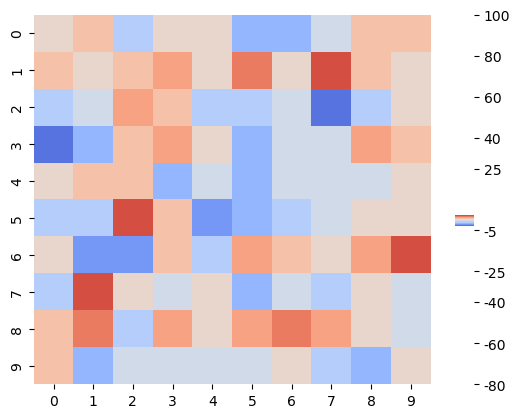

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Generate some example data
data = np.random.randn(10, 10)

# Define the colormap and the boundaries for the colors
bounds = [-80, -60,-40,-25,-5,25,40,60,80,100]
cmap = ListedColormap(sns.color_palette("coolwarm", len(bounds)))

# Create the heatmap plot
ax = sns.heatmap(data, cmap=cmap, vmin=-100, vmax=100, cbar_kws={'ticks': bounds})

# Set the tick labels for the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)



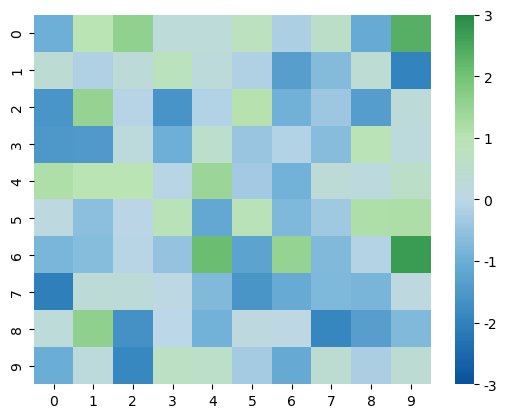

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Generate some example data
data = np.random.randn(10, 10)

# Define the boundaries for the colors
bounds = [-3, -2, -1, 0, 1, 2, 3]

# Define the colors for the colormap
colors = ["#08519c", "#3182bd", "#6baed6", "#bdd7e7", "#bae4b3", "#74c476", "#238b45"]

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list("", list(zip(np.linspace(0, 1, len(colors)), colors)))

# Create the heatmap plot
ax = sns.heatmap(data, cmap=cmap, vmin=-3, vmax=3, cbar_kws={'ticks': bounds})

# Set the tick labels for the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks(bounds)
cbar.set_ticklabels(bounds)


# Check wind sphera

In [4]:
import xarray as xr 

u=xr.open_dataset("/mnt/data/lcesarini/SPHERA/u/200912_ten3_Tdeep_u_remapped.grb2",engine='cfgrib')
u

<xarray.Dataset>
Dimensions:            (time: 264, latitude: 158, longitude: 272)
Coordinates:
  * time               (time) datetime64[ns] 2009-12-21T01:00:00 ... 2010-01-01
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 43.25 43.28 43.3 ... 47.51 47.54 47.57
  * longitude          (longitude) float64 6.5 6.527 6.555 ... 13.9 13.92 13.95
    valid_time         (time) datetime64[ns] ...
Data variables:
    u10                (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach 
    history:                 2023-02-27T19:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
path_uas = f"/mnt/data/lcesarini/SPHERA/u/"
path_vas = f"/mnt/data/lcesarini/SPHERA/v/"

# uas=xr.open_mfdataset(glob(path_uas+"*")[0]) 
# print(uas.time[0:2].values)

year=2000
    

path_mw = "/mnt/data/lcesarini/SPHERA/mw"
uas = xr.open_mfdataset(glob(f"{path_uas}*{year}**remapped*"),engine="cfgrib")
vas = xr.open_mfdataset(glob(f"{path_vas}*{year}**remapped*"),engine="cfgrib")


In [8]:
name_file = f"mw_{year}_remapped_SPHERA.nc"
mw = np.sqrt(np.power(uas.u10.values,2) + np.power(vas.v10.values,2))

In [11]:
uas.u10.shape

(8735, 158, 272)

In [13]:
mw.shape

(8735, 158, 272)

In [14]:
mw_d = xr.DataArray(mw, 
            coords={'time':uas.time,
                    'lon': uas.longitude.values, 
                    'lat': uas.latitude.values
                    },
            dims={'time':uas.time.shape[0],'lat':uas.latitude.shape[0],'lon':uas.longitude.shape[0]},
            attrs = uas.attrs
) 
                    # dict(description = "mw stands for 'Module Wind",


In [15]:
mw_d

<xarray.DataArray (time: 8735, lat: 158, lon: 272)>
array([[[1.057028  , 0.5809688 , 0.27632257, ...,        nan,
                nan,        nan],
        [2.6170146 , 1.9826312 , 1.7073071 , ...,        nan,
                nan,        nan],
        [2.9912908 , 2.5324678 , 2.5609148 , ...,        nan,
                nan,        nan],
        ...,
        [2.2809453 , 1.9314882 , 1.488027  , ..., 1.7057953 ,
         1.7057953 ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.60653436, 0.53697133, 0.9268635 , ...,        nan,
                nan,        nan],
        [1.7660329 , 1.6461035 , 2.3821292 , ...,        nan,
                nan,        nan],
        [2.5265682 , 2.1950476 , 2.5270102 , ...,        nan,
                nan,        nan],
...
        [3.7349207 , 3.9558654 , 3.9494905 , ..., 1.230188  ,
         1.230188  ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[1.5866916 , 1.5579319 , 1.5165563 , ...,        nan,
                nan,        nan],
        [2.0479767 , 2.1578684 , 2.3358576 , ...,        nan,
                nan,        nan],
        [2.3593447 , 2.1911416 , 2.1230407 , ...,        nan,
                nan,        nan],
        ...,
        [3.3036003 , 3.368937  , 3.3356779 , ..., 2.1498122 ,
         2.1498122 ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T01:00:00 ... 2001-01-01
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach 
    history:                 2023-02-27T19:11 GRIB to CDM+CF via cfgrib-0.9.1...

# Orografia

In [1]:
import os
import argparse
import rioxarray
import numpy as np 
import xarray as xr 
import pandas as pd
import metview as mv
import seaborn as sns
from glob import glob
from tqdm import tqdm
import geopandas as gpd
import matplotlib as mpl
from random import sample
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
from shapely.geometry import mapping
from cartopy import feature as cfeature
from utils import *

In [2]:
shp_triveneto = gpd.read_file("data/gadm36_ITA.gpkg", layer="gadm36_ITA_1")
shp_triveneto = shp_triveneto[np.isin(shp_triveneto.NAME_1,["Veneto","Trentino-Alto Adige"])]


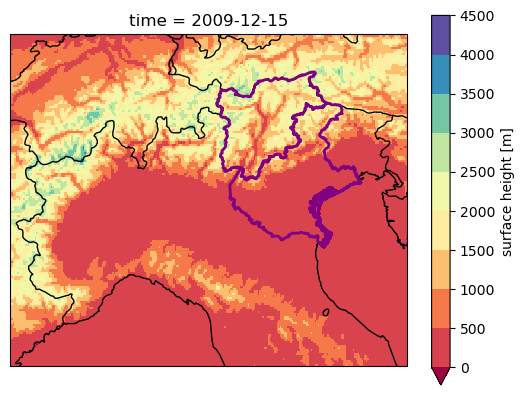

In [4]:
oro_eth=xr.load_dataset("/mnt/data/lcesarini/orog_ALP3_ETH_fx_remap.nc")
ax=plt.axes(projection=ccrs.PlateCarree())
oro_eth.orog.isel(time=0).plot.pcolormesh(levels=np.arange(0,4900,500),cmap="Spectral",ax=ax)
shp_triveneto.boundary.plot(ax=ax,edgecolor='purple',linewidth=2)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
# ax.set_extent([])

In [26]:
oro_cnrm=xr.load_dataset("/mnt/data/lcesarini/orog_ALP-3_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-AROME41t1_fx_remap.nc")
oro_cnrm.orog

<xarray.DataArray 'orog' (lat: 158, lon: 272)>
array([[  63.35886966,   28.68799607,   29.447715  , ...,    0.        ,
           0.        ,    0.        ],
       [  99.44909798,   86.79959492,   57.00825819, ...,    0.        ,
           0.        ,    0.        ],
       [ 209.73569054,  207.60818101,  173.66824288, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [ 367.96465129,  395.89147425,  421.40357245, ..., 1225.30769726,
        1109.48535917, 1156.43632193],
       [ 301.35386923,  321.9617811 ,  349.86067966, ...,  972.24716113,
         879.7669114 ,  882.17588252],
       [ 288.7082984 ,  305.58484218,  334.49021844, ...,  898.96075895,
         945.16694582, 1082.50016277]])
Coordinates:
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57

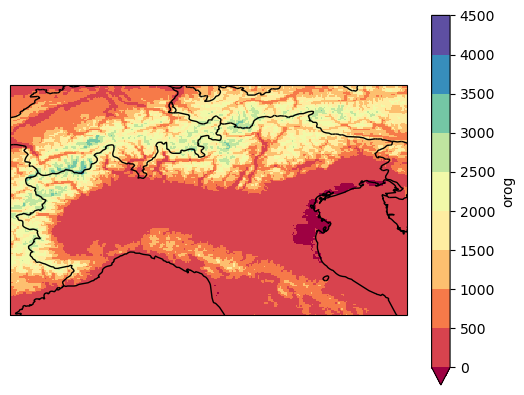

In [27]:
ax=plt.axes(projection=ccrs.PlateCarree())
oro_cnrm.orog.plot.pcolormesh(levels=np.arange(0,4900,500),cmap="Spectral",ax=ax)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

In [28]:
PATH_COMMON_DATA="/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT"
ele=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/datiDallan/CPM_ETH_Italy_2000-2009_pr_hour.nc")
eth__rg=xr.open_mfdataset(f"{PATH_COMMON_DATA}/ETH/CPM/pr/ETH_ECMWF-ERAINT_*.nc").load()


In [30]:
ij=pd.read_table("griglia_ele.txt",header=None)
ij.columns=["name","i","j"]
ij.i=ij.i-1
ij.j=ij.j-1

In [85]:
idx=np.random.choice(np.arange(0,ij.shape[0]))
B=ele.isel(rlon=ij.i[idx],rlat=ij.j[idx]).pr
A=eth__rg.sel(lon=B.lon.item(),lat=B.lat.item(),method='nearest').pr



In [86]:
print(
f"""
{ij.name[idx]}
"""
)

# {np.abs((111.139 * (A.lon.item()-11.20880581)) * 1000):.2f}m
# {np.abs((111.139 * (A.lat.item()-45.62689319)) * 1000):.2f}m



VE_0091



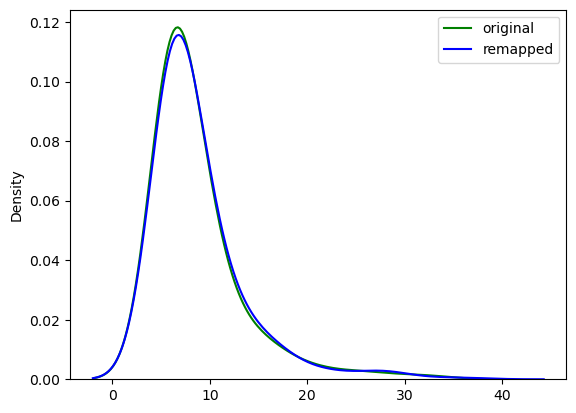

In [87]:
import seaborn as sns
ax=plt.axes()
# A[A>5].plot.hist(ax=ax,bins=105,density=True,alpha=0.5,color="green")
sns.kdeplot(A[A>5].values, bw=0.5,ax=ax,color='green',label='original')
sns.kdeplot(B[B>5].values, bw=0.5,ax=ax,color='blue',label='remapped')
plt.legend()
# B[B>5].plot.hist(ax=ax,bins=105,density=True,alpha=0.5,color="blue")

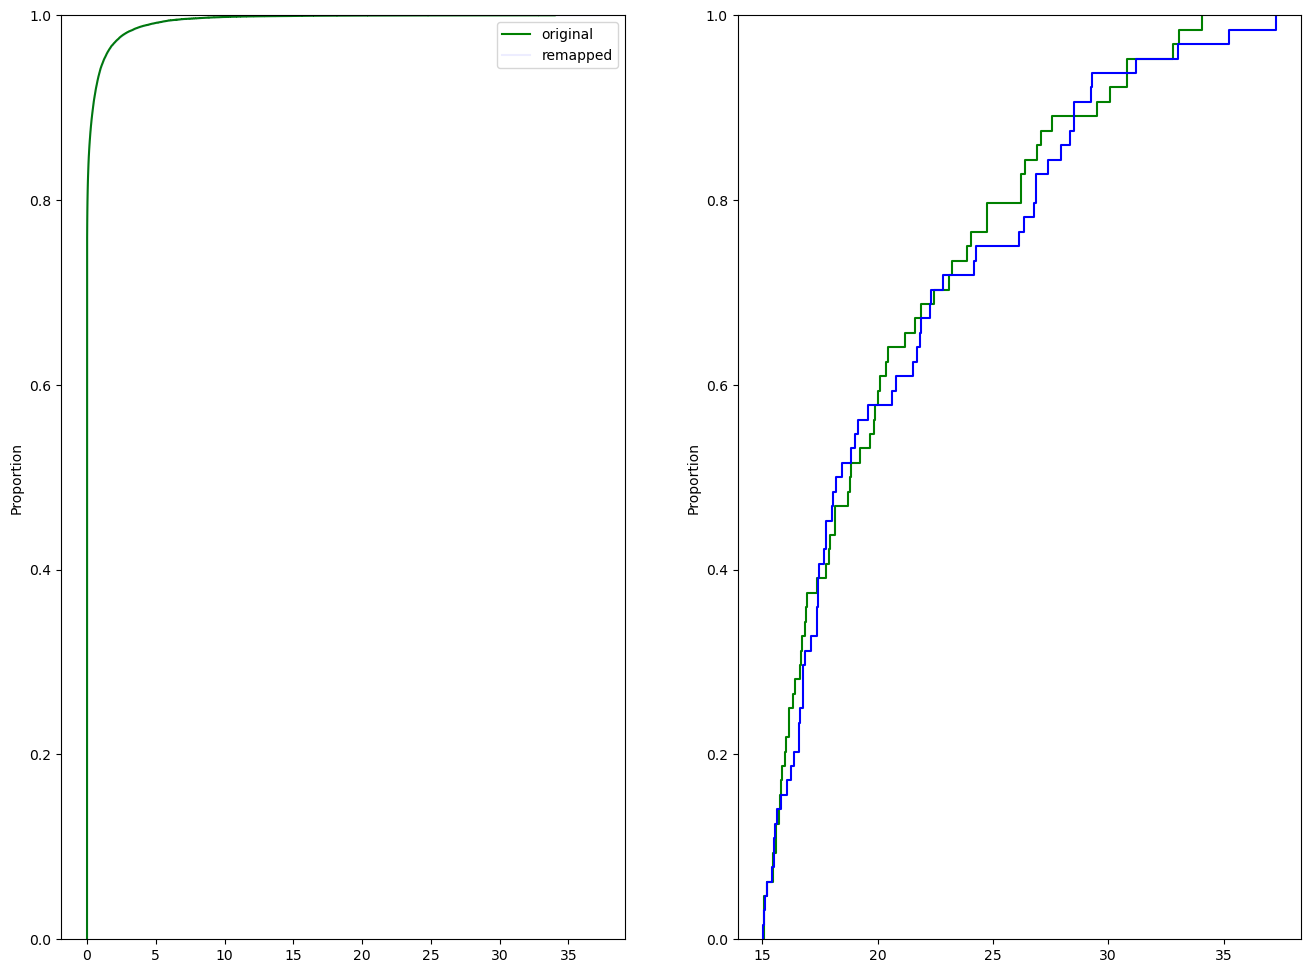

In [88]:
fig,ax=plt.subplots(1,2,figsize=(16,12))
# A[A>5].plot.hist(ax=ax,bins=105,density=True,alpha=0.5,color="green")
sns.ecdfplot(A.values,ax=ax[0],color='green',label='original',alpha=1)
sns.ecdfplot(B.values,ax=ax[0],color='blue',label='remapped',alpha=0.07)
sns.ecdfplot(A[A>15].values,ax=ax[1],color='green',label='original')
sns.ecdfplot(B[B>15].values,ax=ax[1],color='blue',label='remapped')
ax[0].legend()

In [89]:
pd.DataFrame(pd.to_datetime(A.time.values)).\
    to_csv(f"/home/lcesarini/2022_resilience/data/dates_{ij.name[idx]}.csv",
            index=0,
            header = ["date"]
            )
pd.DataFrame(A.values).\
    to_csv(f"/home/lcesarini/2022_resilience/data/pr_{ij.name[idx]}.csv",
            index=0,
            header = ["pr"]
            )

In [91]:
ij[ij['name']=='VE_0091']

name    i    j
76  VE_0091  213  153

In [94]:
eth_cdo=xr.open_mfdataset("/mnt/data/lcesarini/*VE_0091.nc*").load()
eth_cdo

<xarray.Dataset>
Dimensions:    (time: 87672, bnds: 2, lon: 1, lat: 1)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T00:33:00 ... 2009-12-31T23:33:00
  * lon        (lon) float64 12.42
  * lat        (lat) float64 46.65
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2000-01-01 ... 2010-01-01
    pr         (time, lat, lon) float32 9.568e-06 3.773e-11 ... 0.003884
Attributes:
    CDI:             Climate Data Interface version 1.9.8 (https://mpimet.mpg...
    Conventions:     CF-1.4
    history:         Thu Mar 02 17:22:42 2023: cdo remapnn,lon=12.42374/lat=4...
    conventionsURL:  http://www.cfconventions.org/
    creation_date:   2019-03-01 11:03:02
    NCO:             netCDF Operators version 4.8.1 (Homepage = http://nco.sf...
    CDO:             Climate Data Operators version 1.9.8 (https://mpimet.mpg...

In [101]:
B=ele.isel(rlon=213,rlat=153).pr
A=eth__rg.sel(lon=B.lon.item(),lat=B.lat.item(),method='nearest').pr
C=eth_cdo.isel(lon=0,lat=0).pr

In [102]:
C

<xarray.DataArray 'pr' (time: 87672)>
array([9.5675214e-06, 3.7732911e-11, 1.8317129e-11, ..., 1.1072092e-06,
       3.3308659e-04, 3.8843858e-03], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T00:33:00 ... 2009-12-31T23:33:00
    lon      float64 12.42
    lat      float64 46.65
Attributes:
    standard_name:  precipitation_amount
    long_name:      total precipitation amount
    units:          kg m-2
    cell_methods:   time: sum

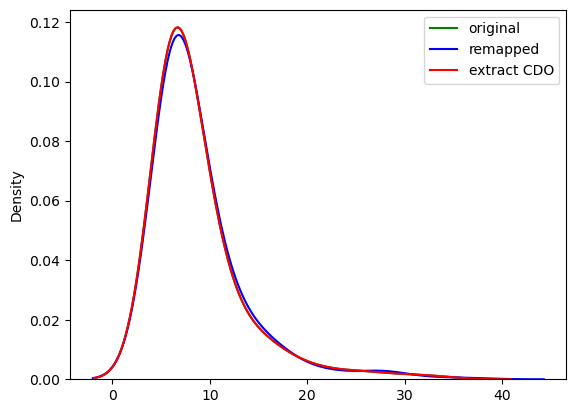

In [103]:
import seaborn as sns
ax=plt.axes()
# A[A>5].plot.hist(ax=ax,bins=105,density=True,alpha=0.5,color="green")
sns.kdeplot(A[A>5].values, bw=0.5,ax=ax,color='green',label='original')
sns.kdeplot(B[B>5].values, bw=0.5,ax=ax,color='blue',label='remapped')
sns.kdeplot(C[C>5].values, bw=0.5,ax=ax,color='red',label='extract CDO')
plt.legend()

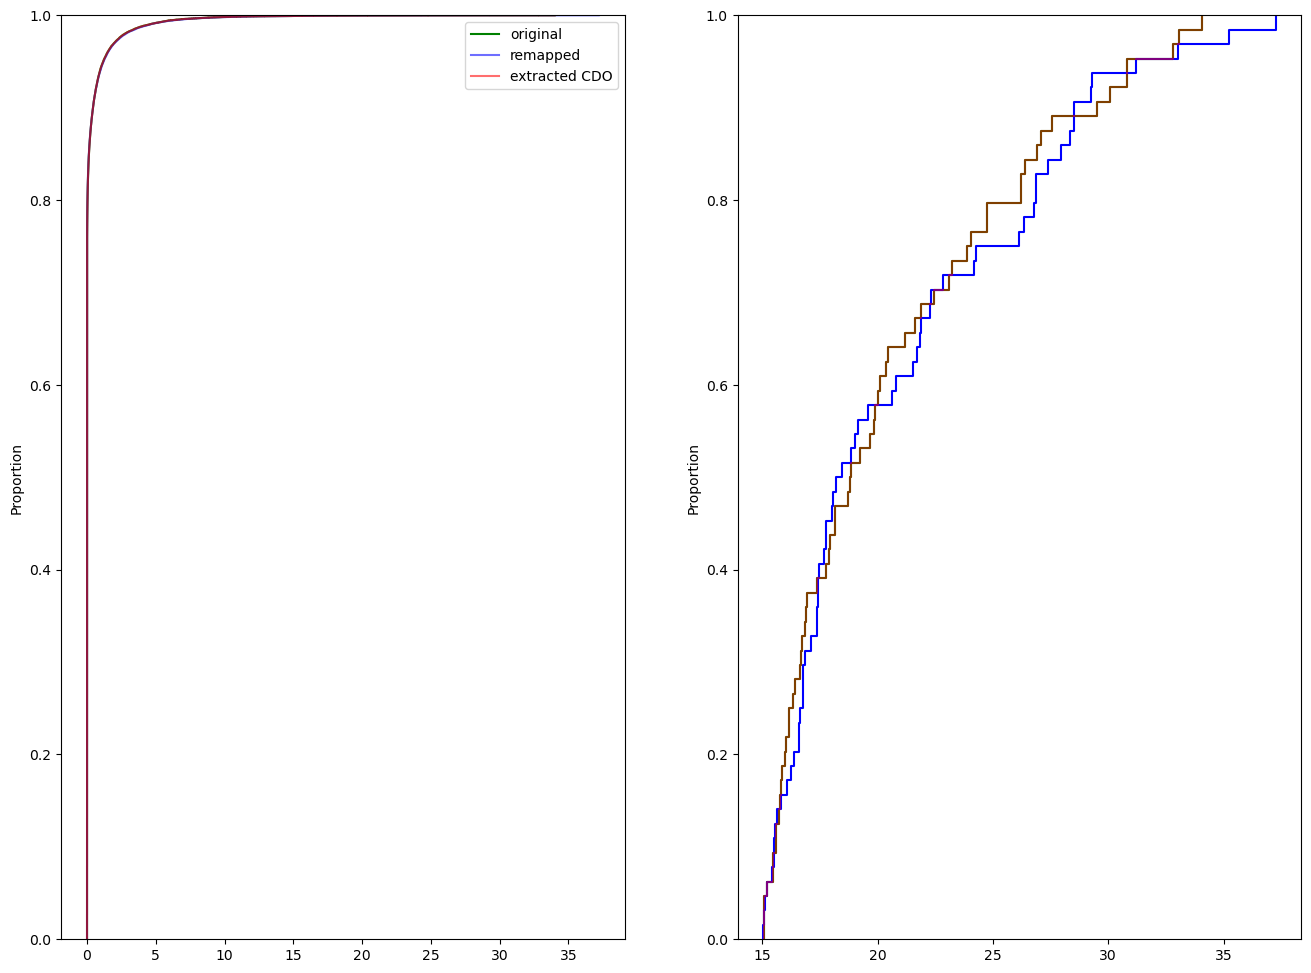

In [107]:
fig,ax=plt.subplots(1,2,figsize=(16,12))
# A[A>5].plot.hist(ax=ax,bins=105,density=True,alpha=0.5,color="green")
sns.ecdfplot(A.values,ax=ax[0],color='green',label='original',alpha=1)
sns.ecdfplot(B.values,ax=ax[0],color='blue',label='remapped',alpha=0.57)
sns.ecdfplot(C.values,ax=ax[0],color='red',label='extracted CDO',alpha=0.57)
sns.ecdfplot(A[A>15].values,ax=ax[1],color='green',label='original')
sns.ecdfplot(B[B>15].values,ax=ax[1],color='blue',label='remapped')
sns.ecdfplot(C[C>15].values,ax=ax[1],color='red',label='extracted CDO',alpha=0.5)
ax[0].legend()